In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
sns.set()

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

def followorbit(vals, path):
    out = []
    for n in range(100):
        closest05 = np.clip(round(path[n] * 2) / 2, 0, 10)
        rank = vals.query(f'nbopp == {n} and othercoop == {closest05}')['rank'].values[0]
        out.append(rank)
    return np.array(out)

import re
def gethighest(vals):
        m = np.argmax([int(re.search('(\d+)', val).group(1)) for val in vals])
        return vals[m]

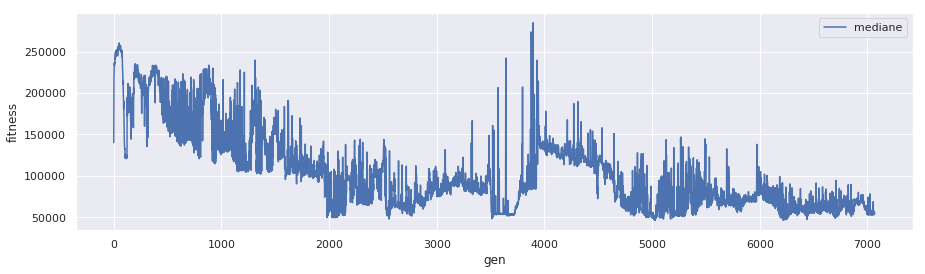

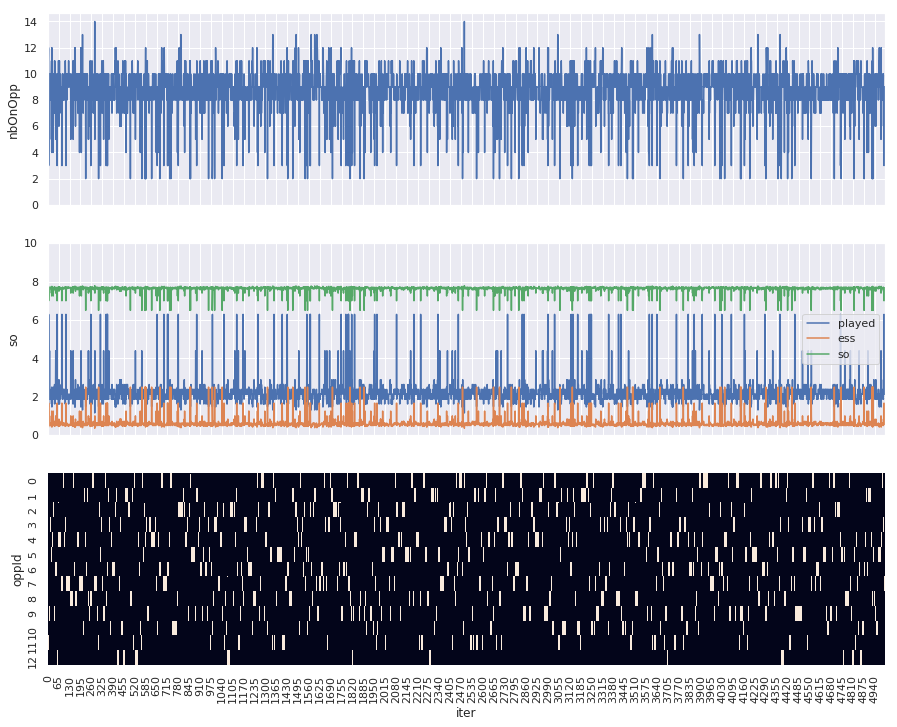

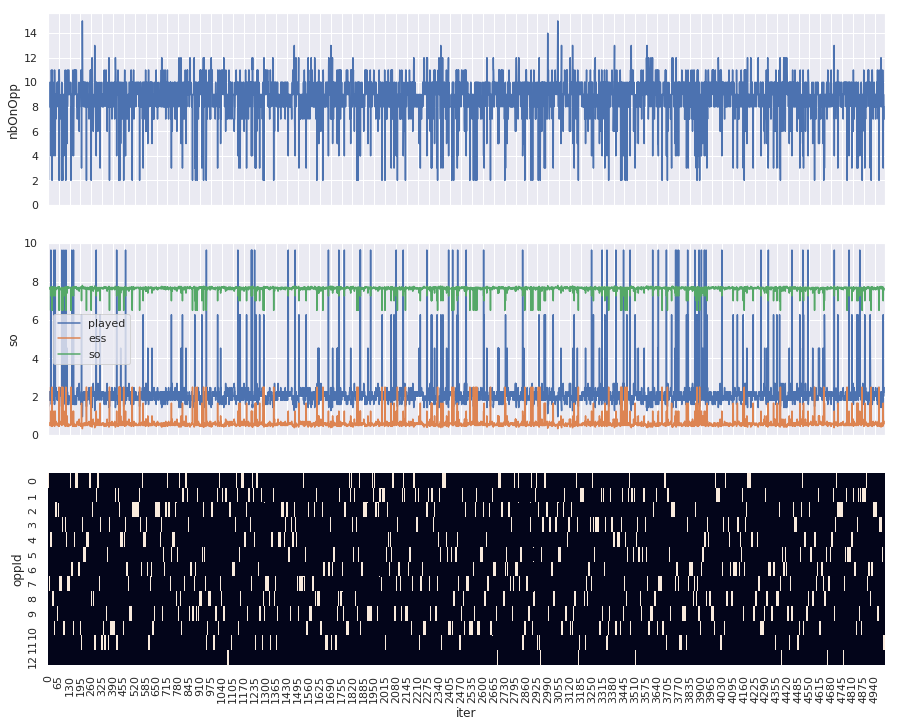

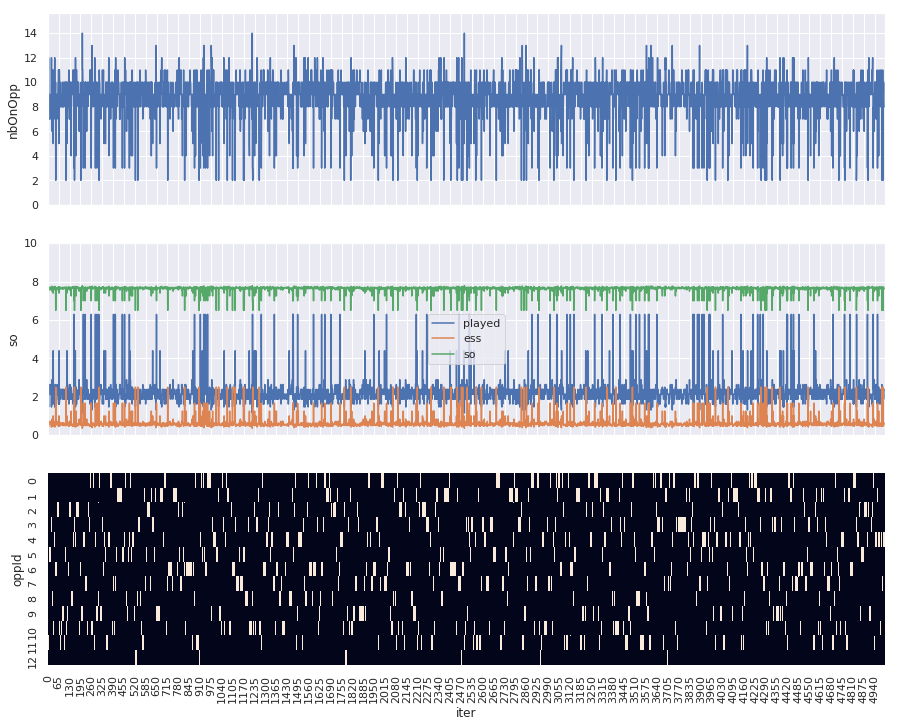

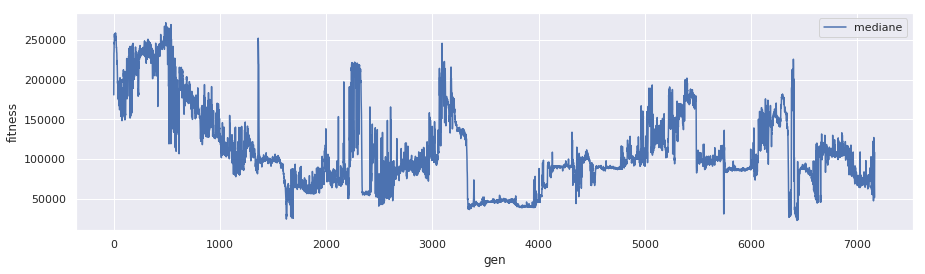

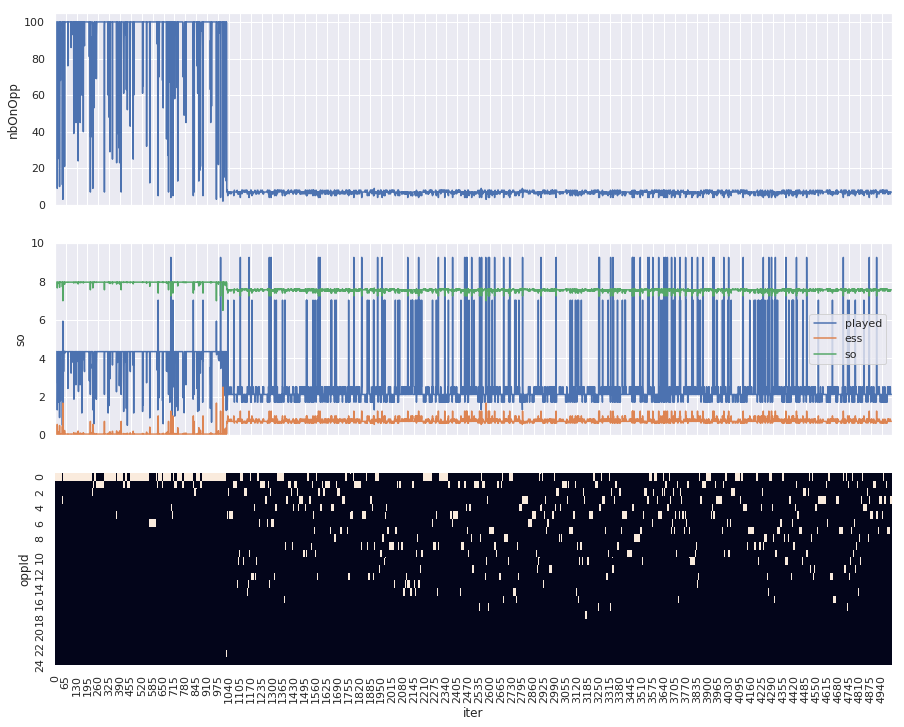

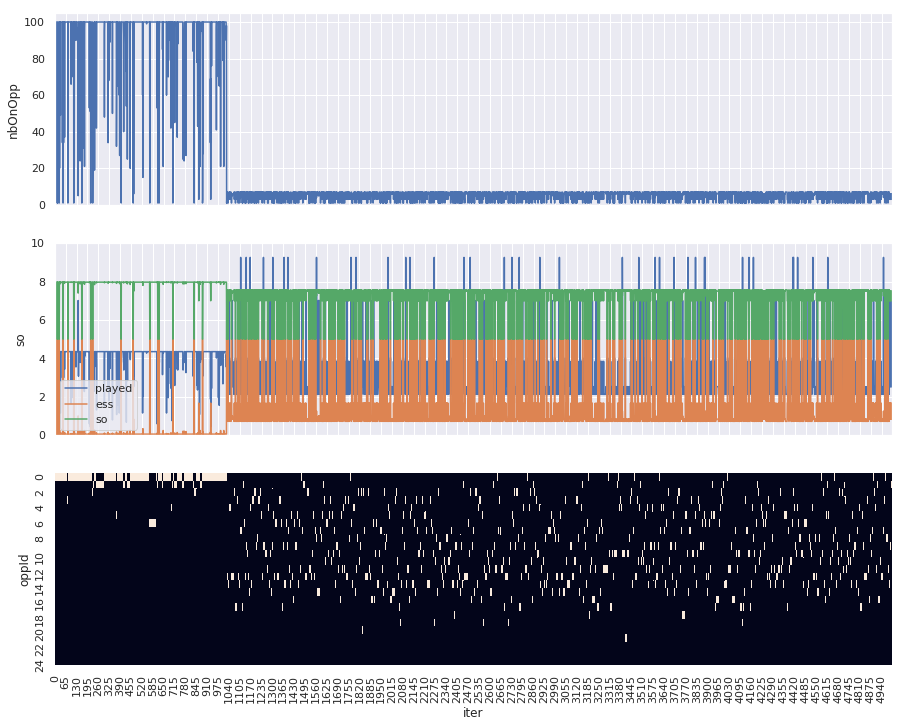

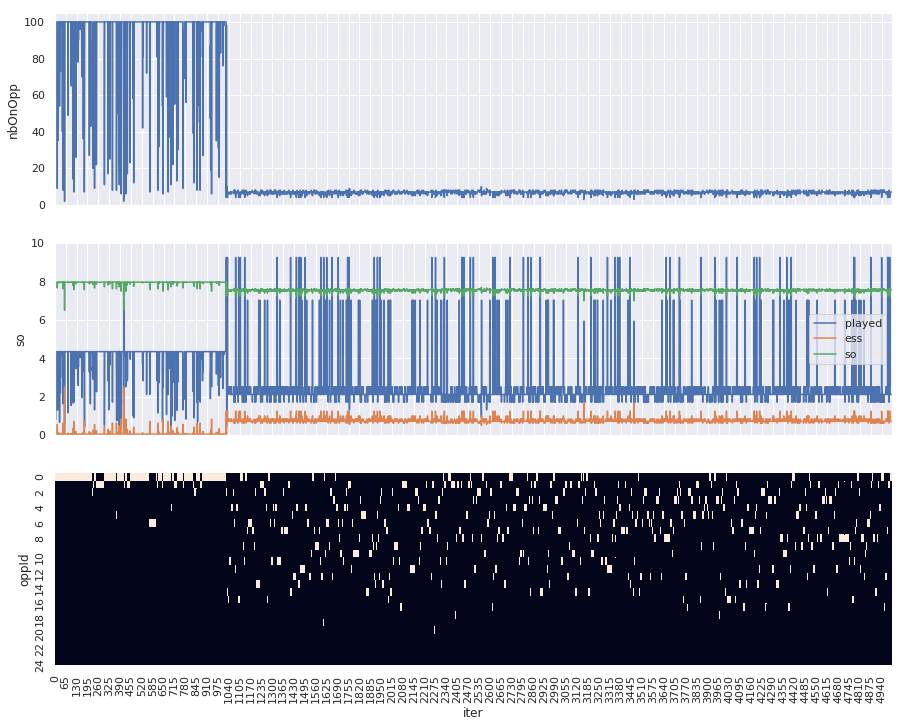

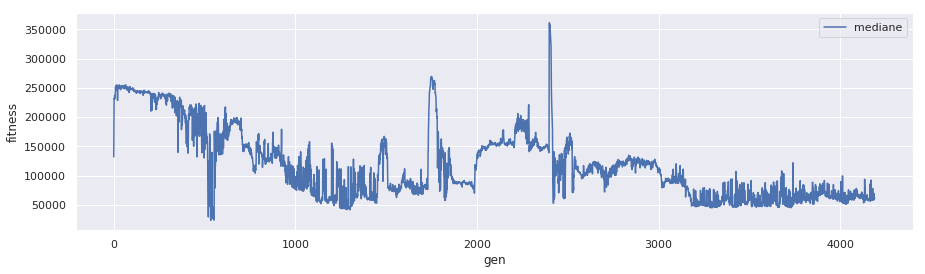

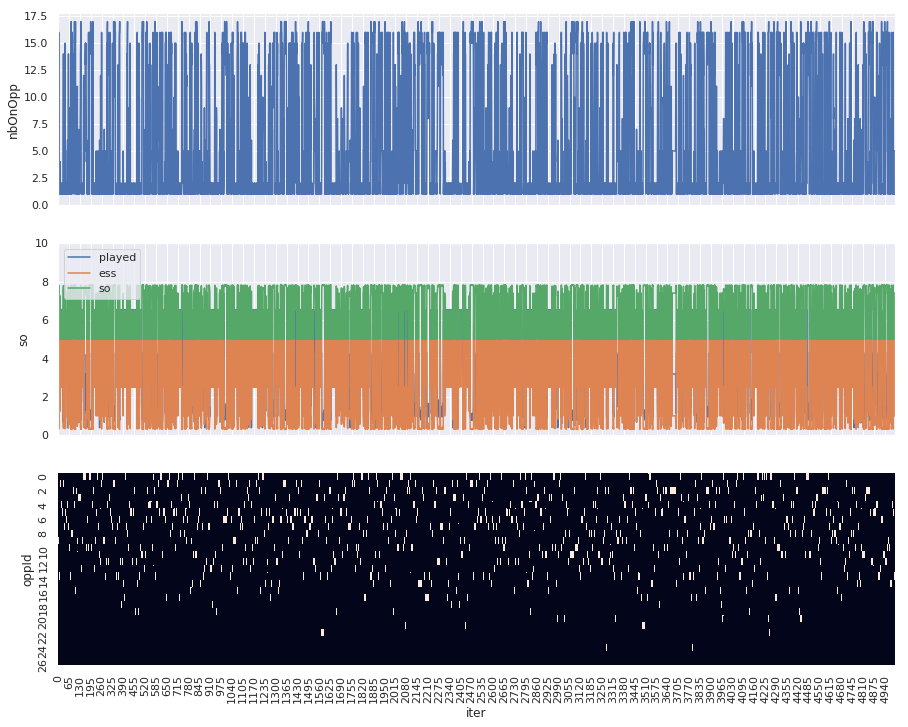

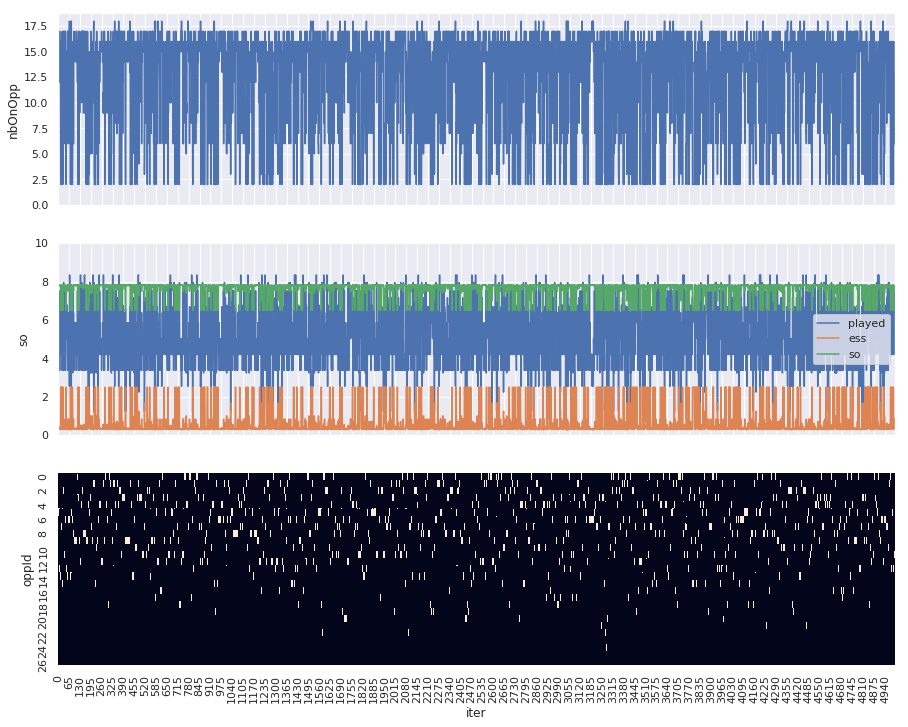

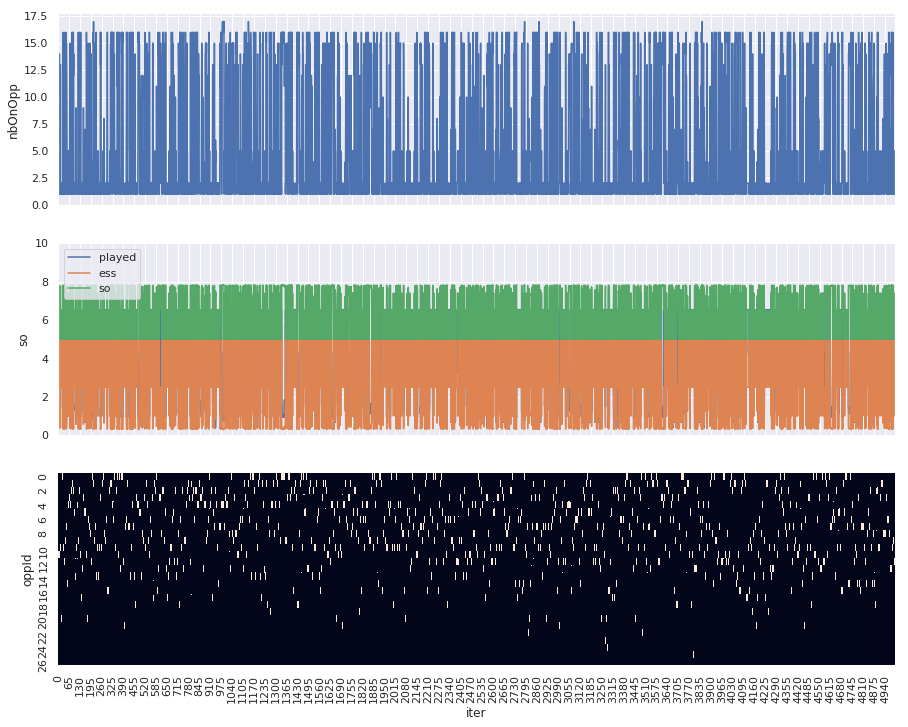

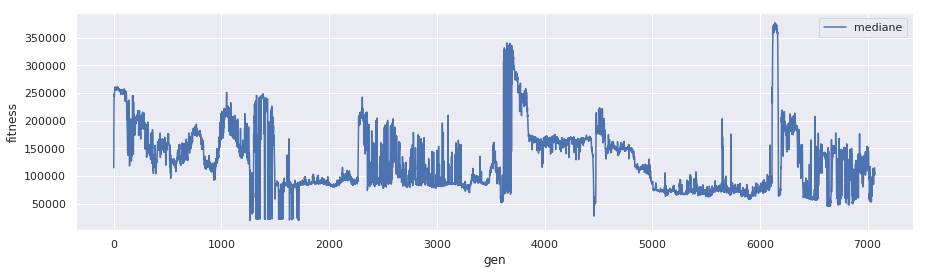

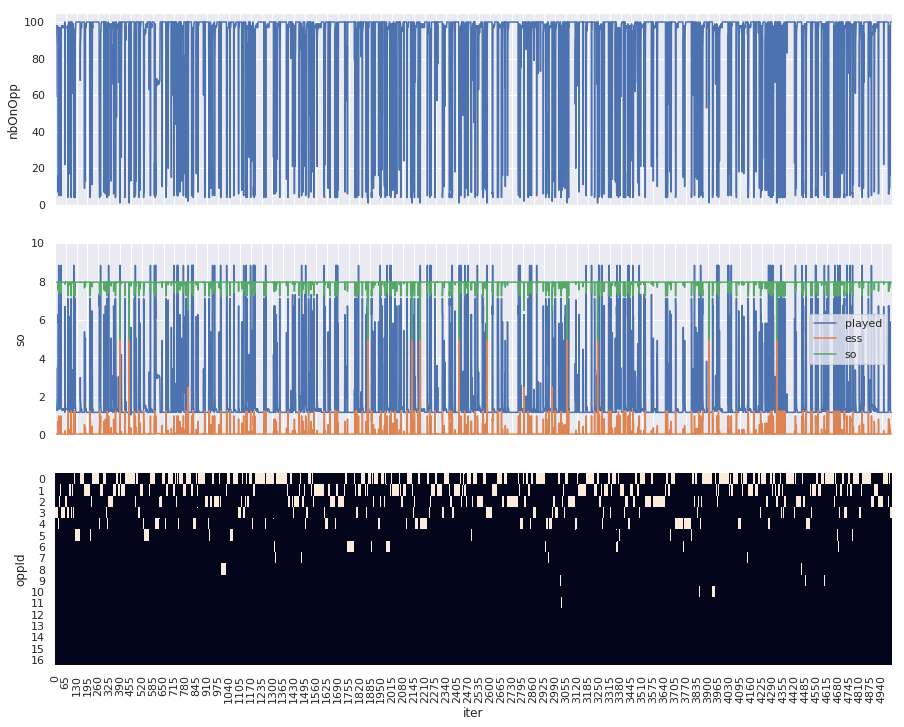

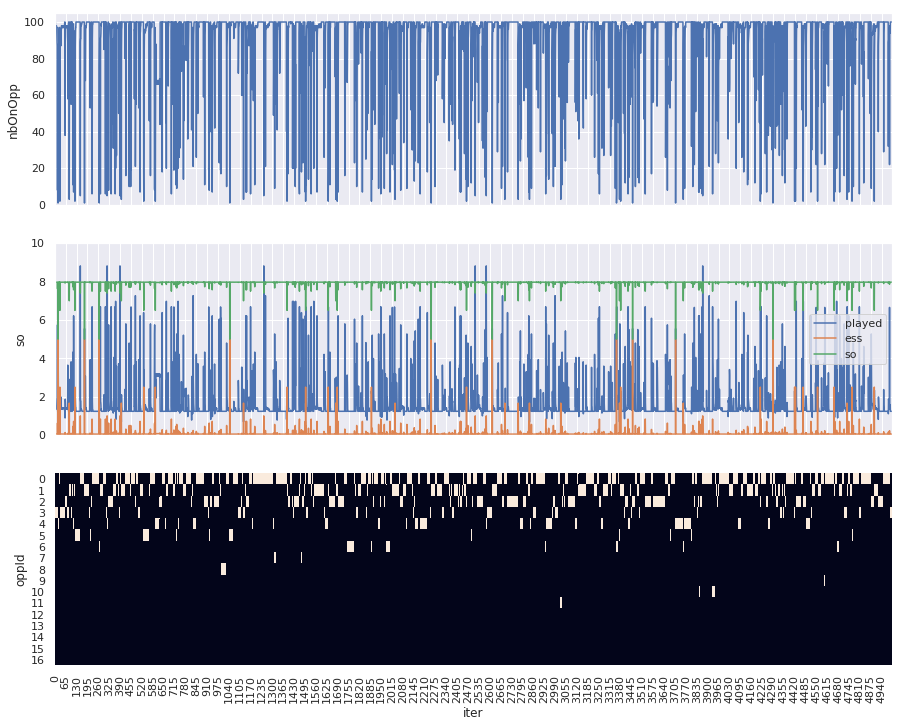

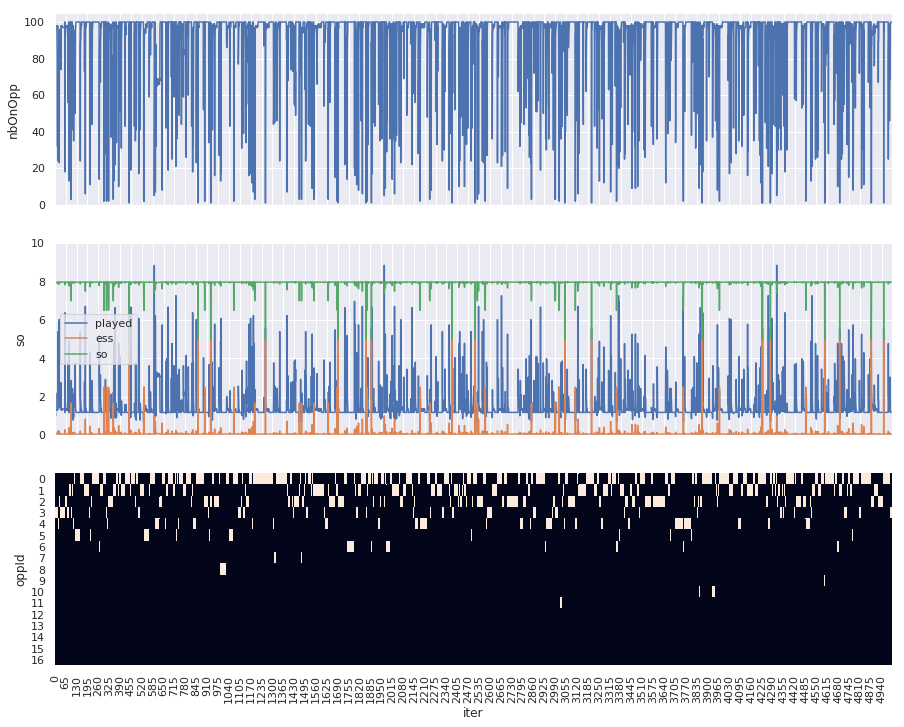

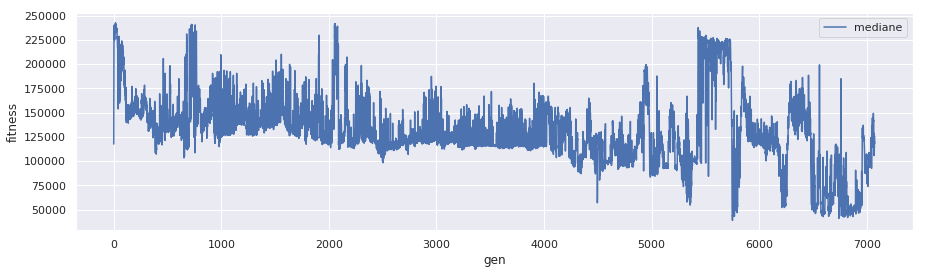

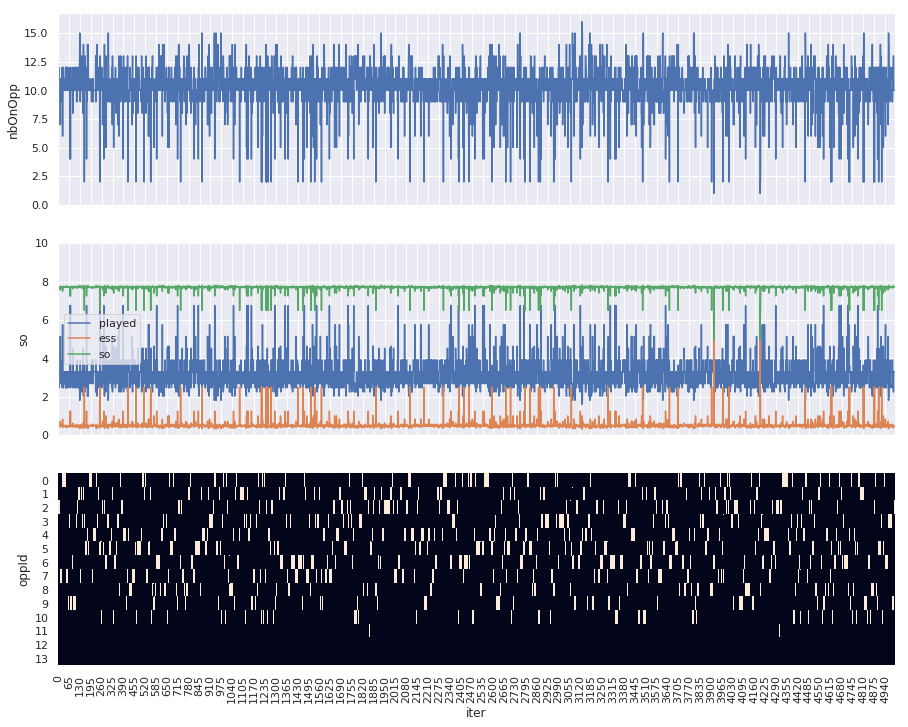

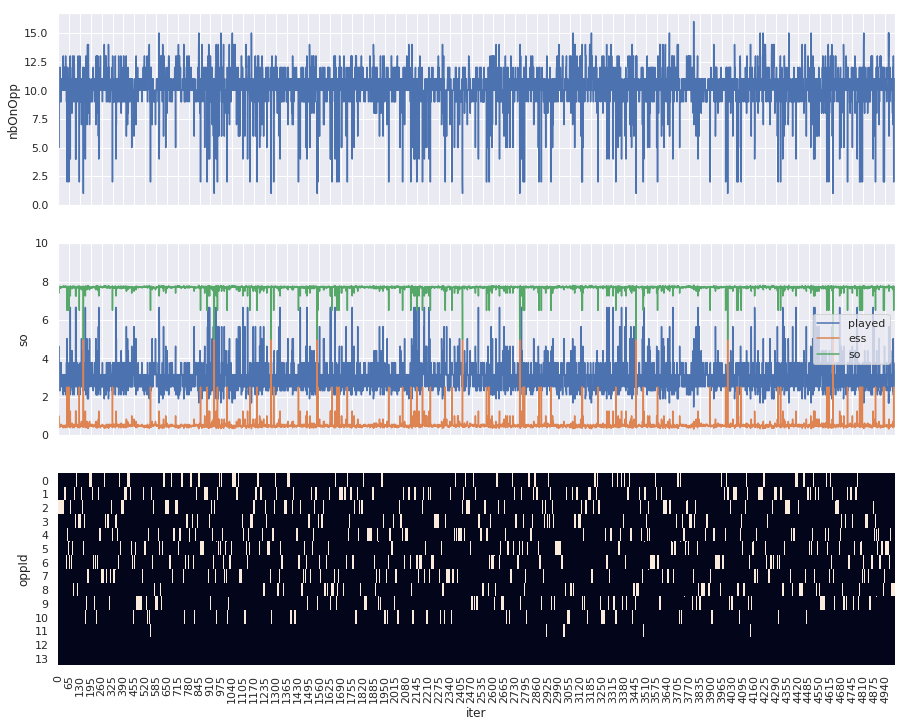

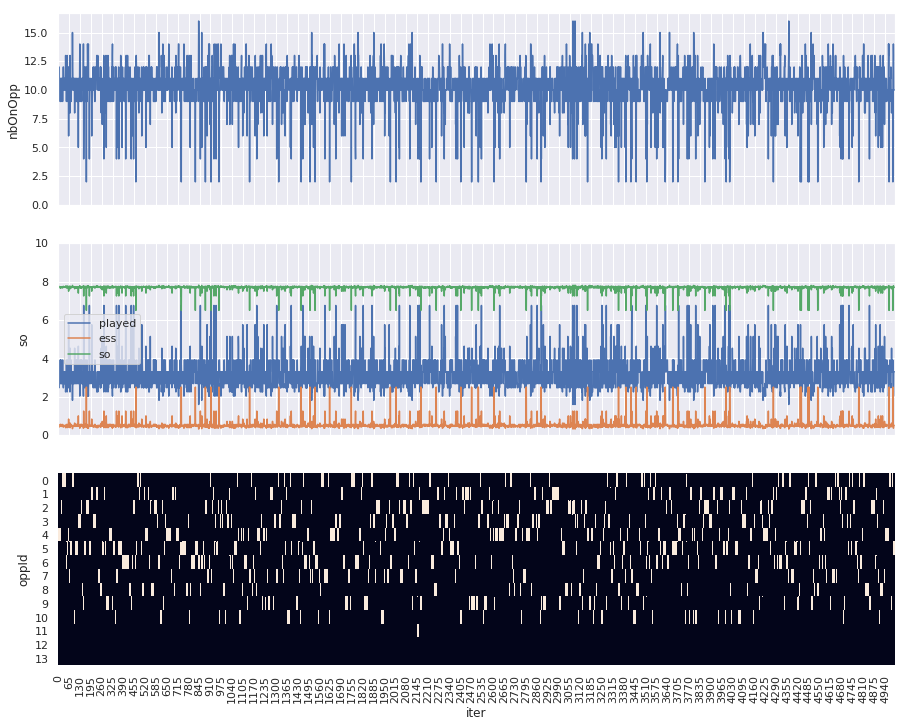

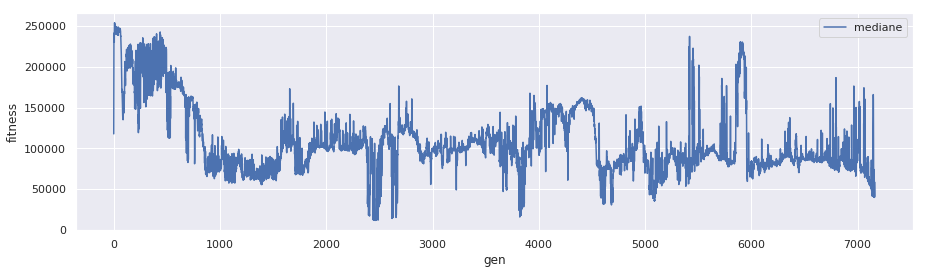

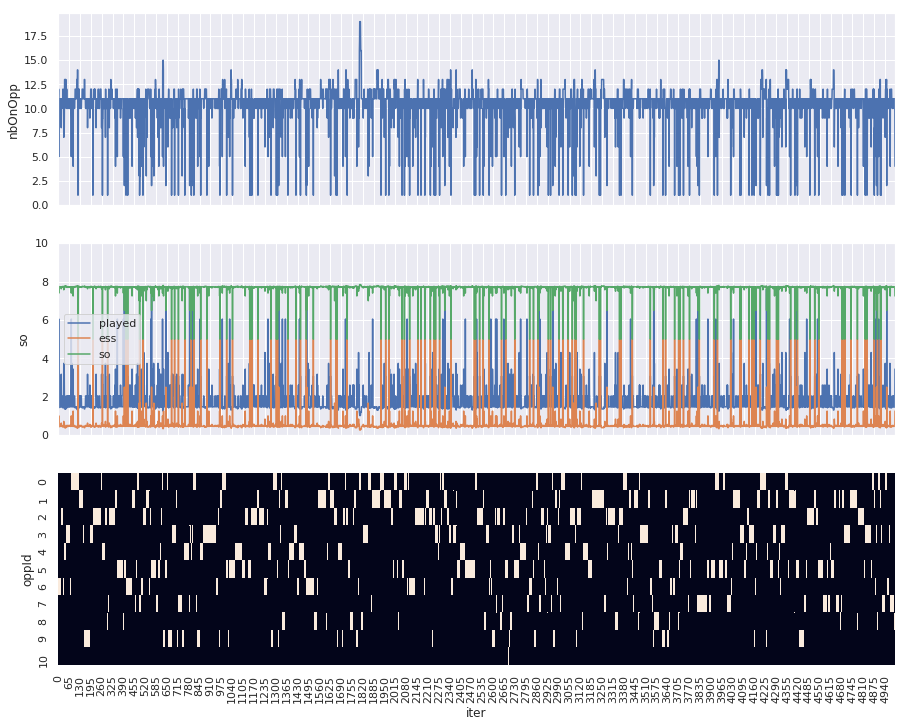

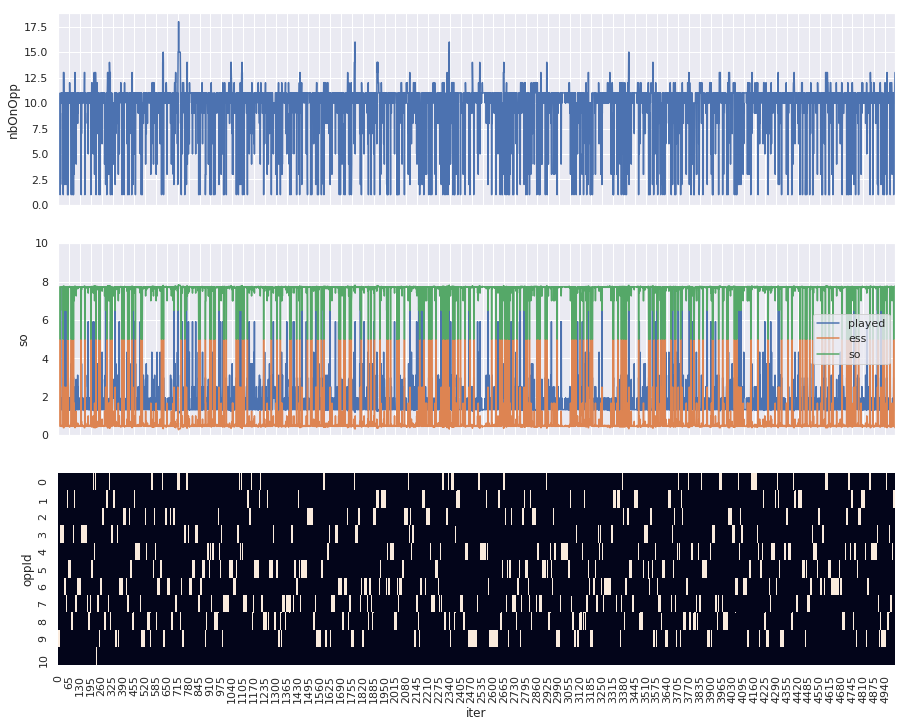

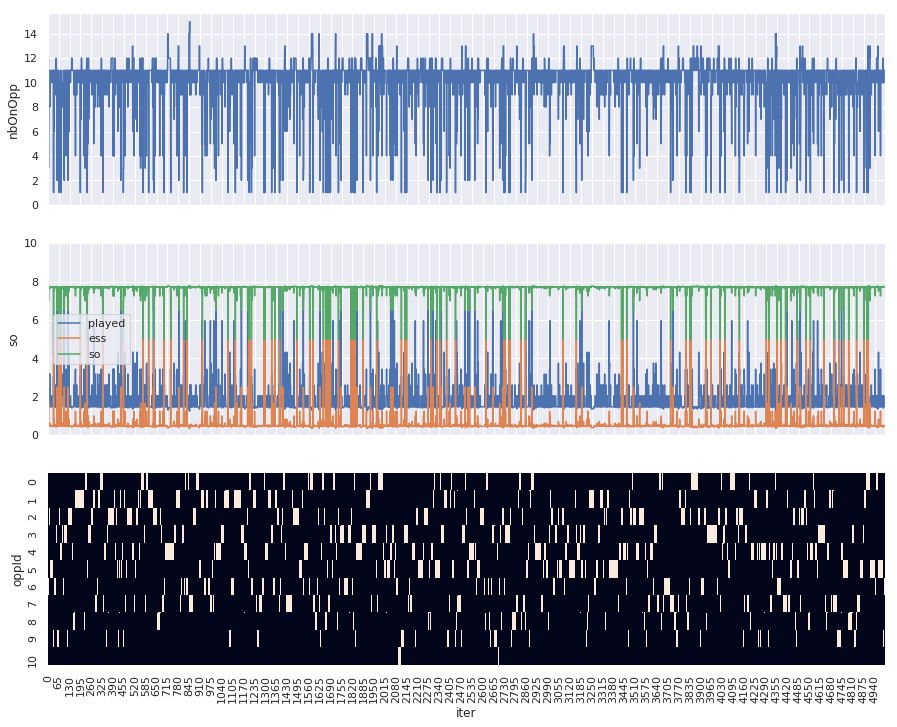

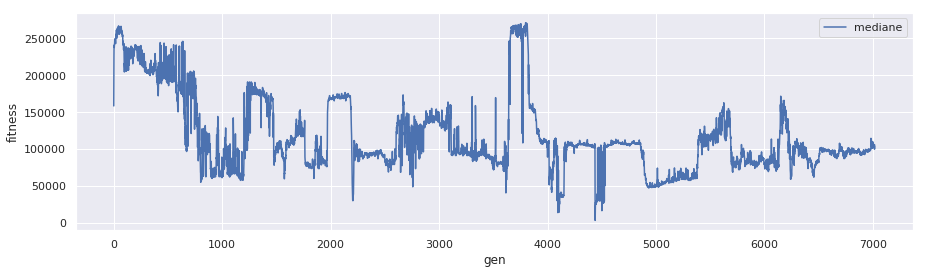

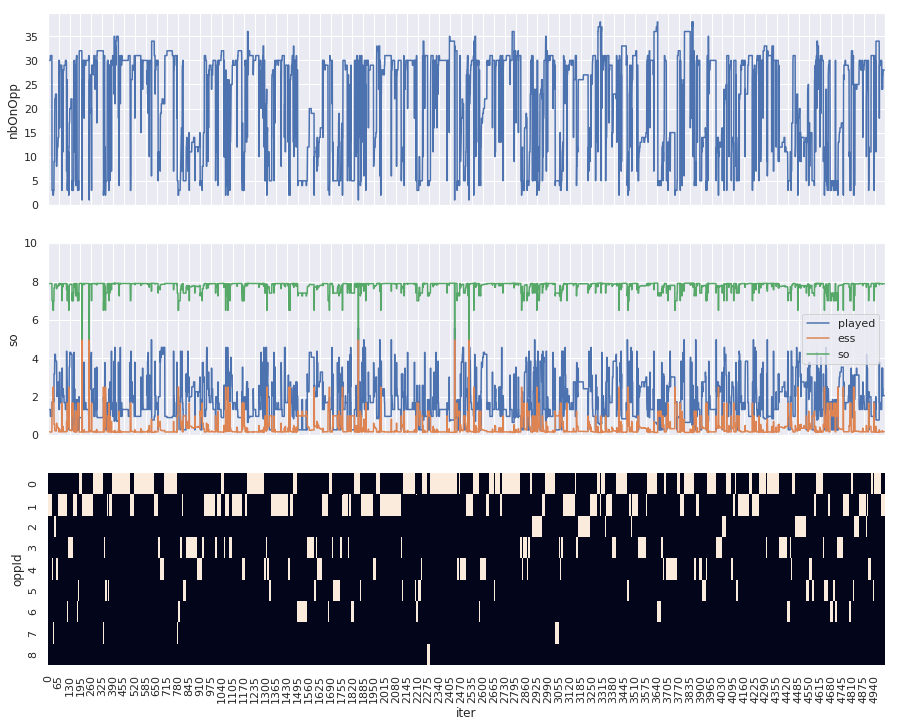

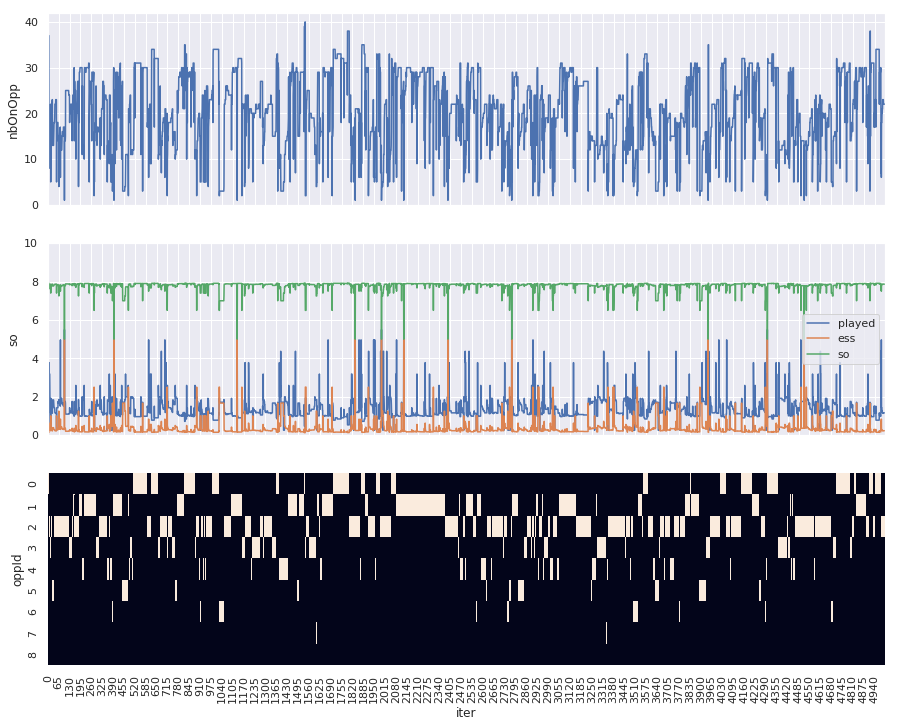

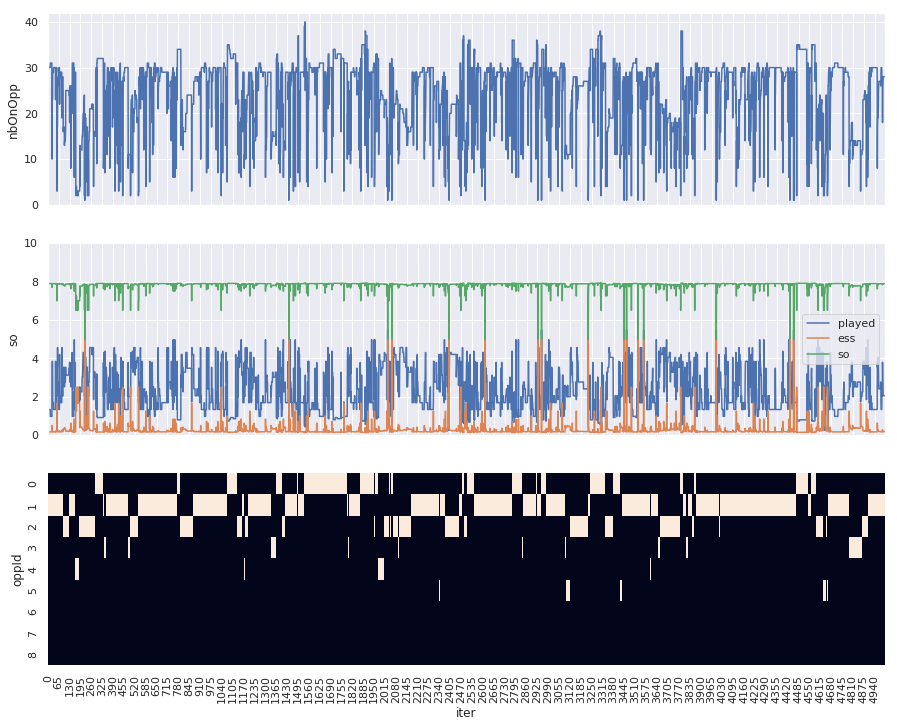

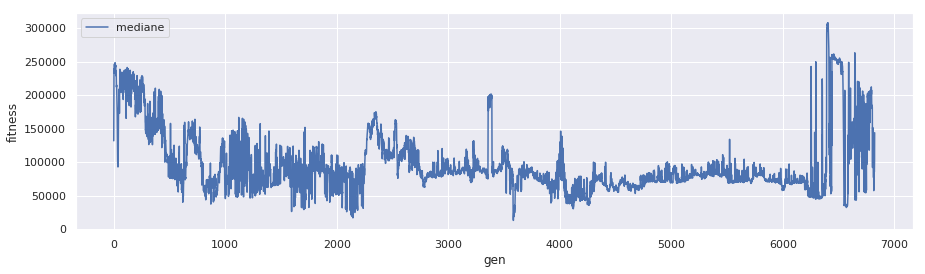

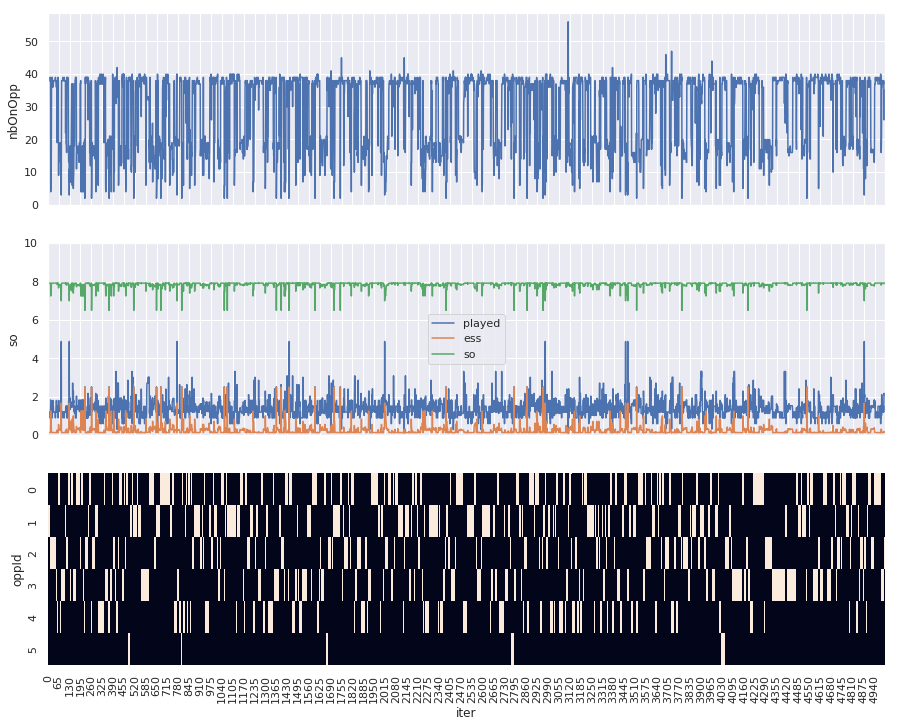

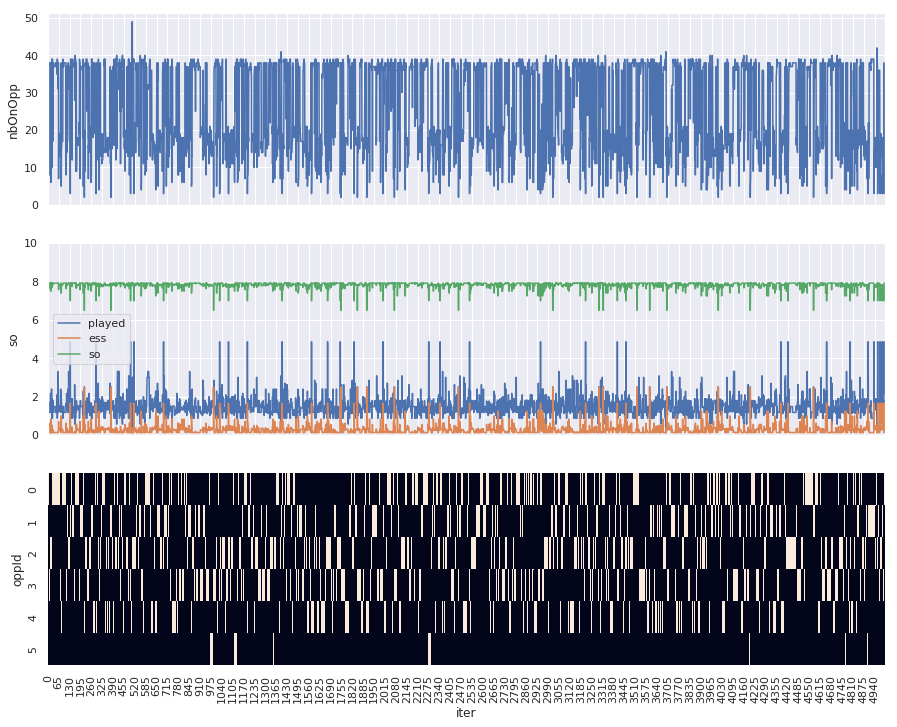

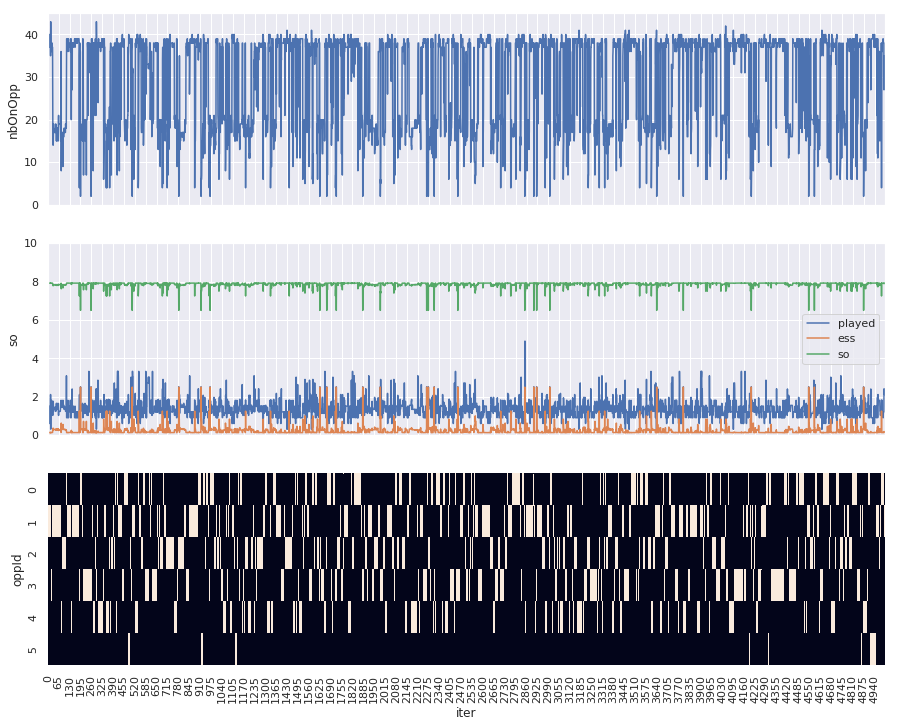

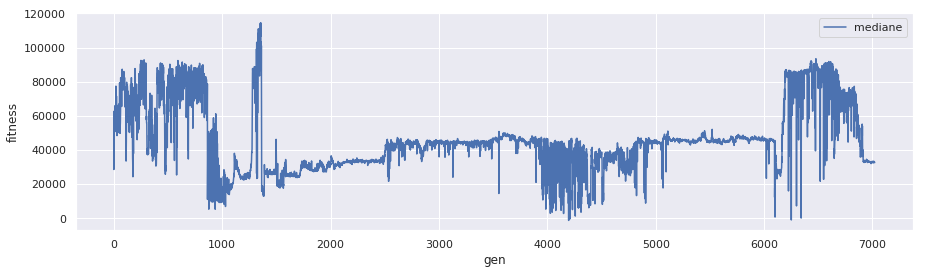

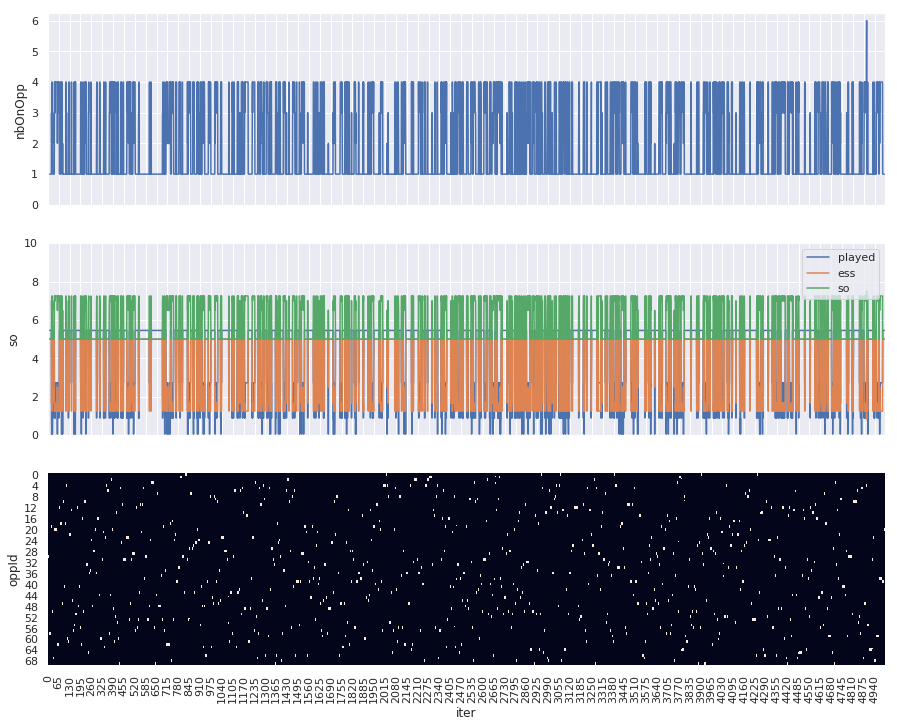

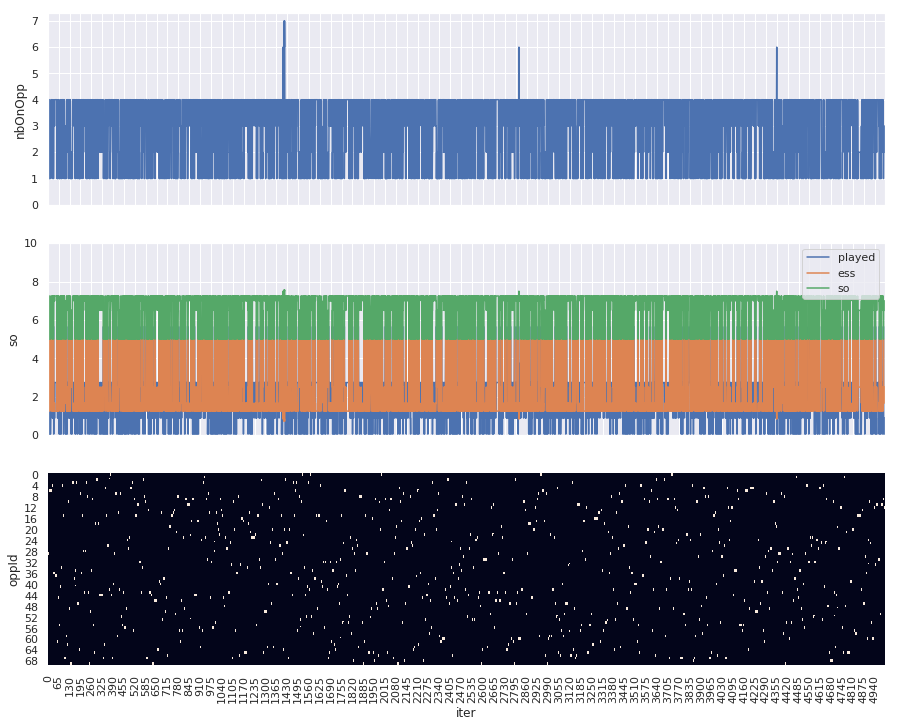

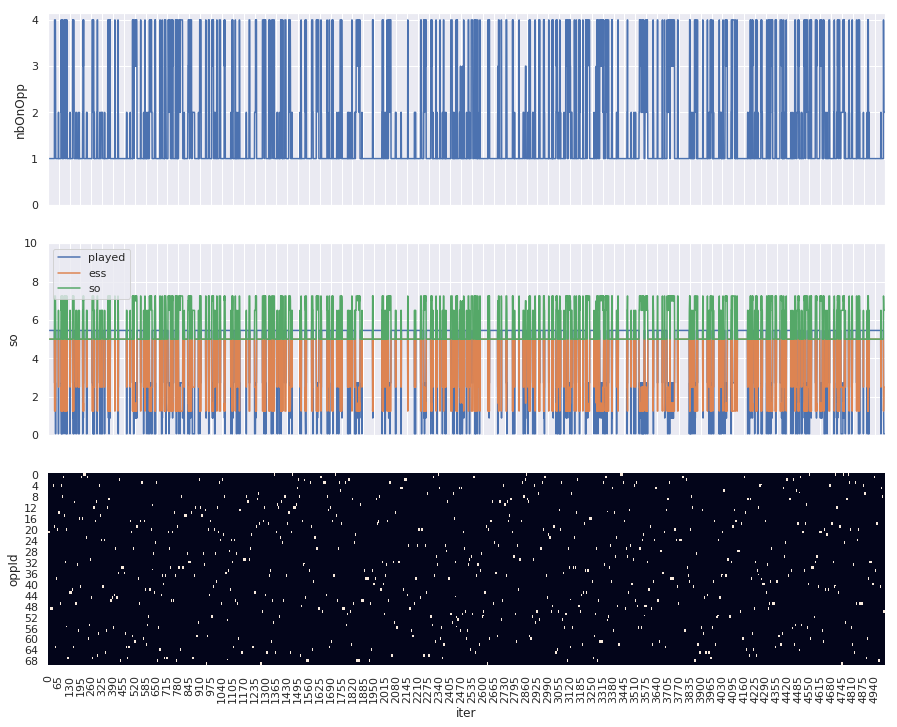

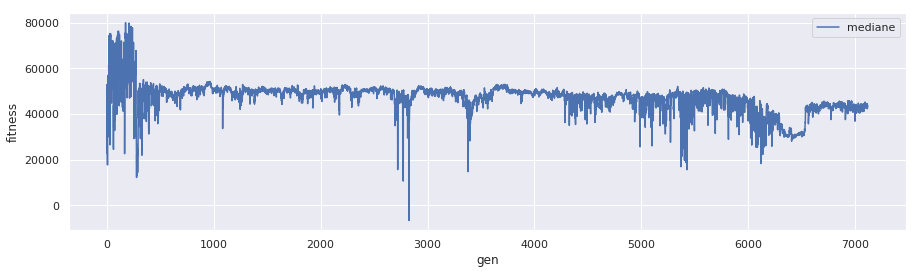

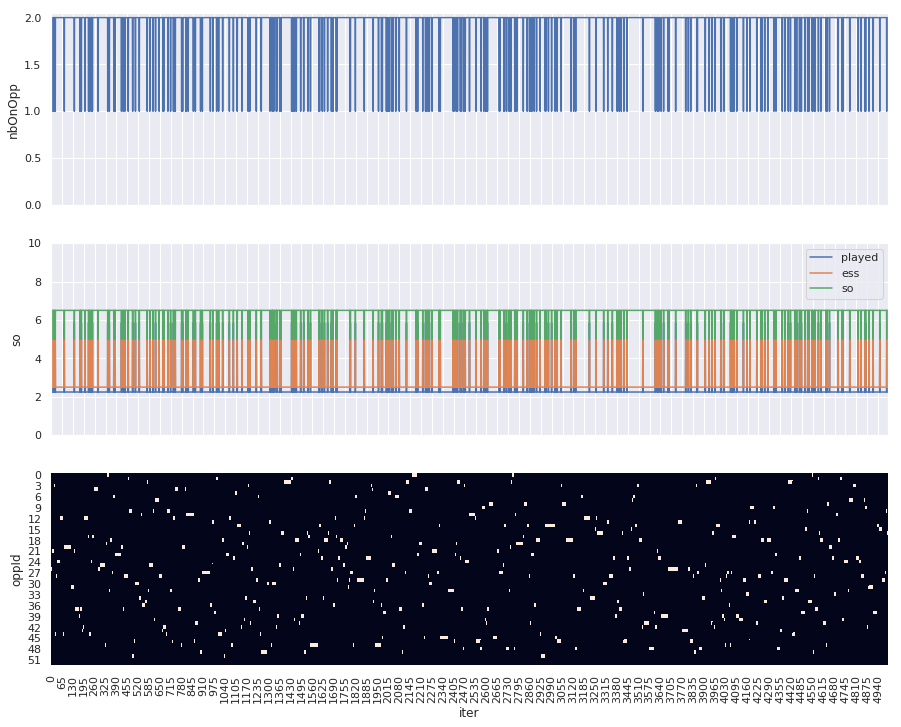

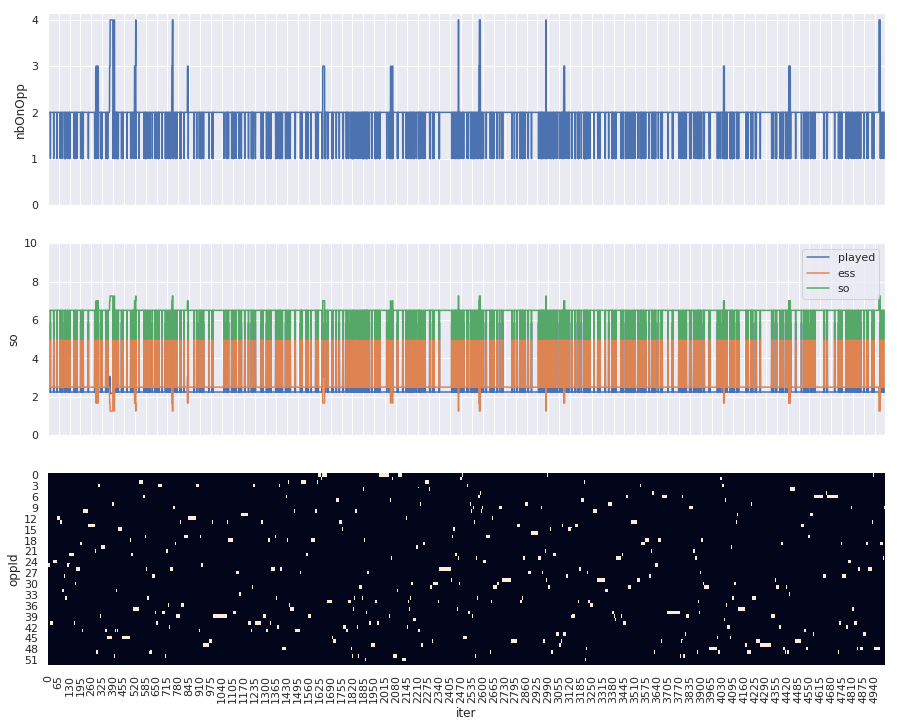

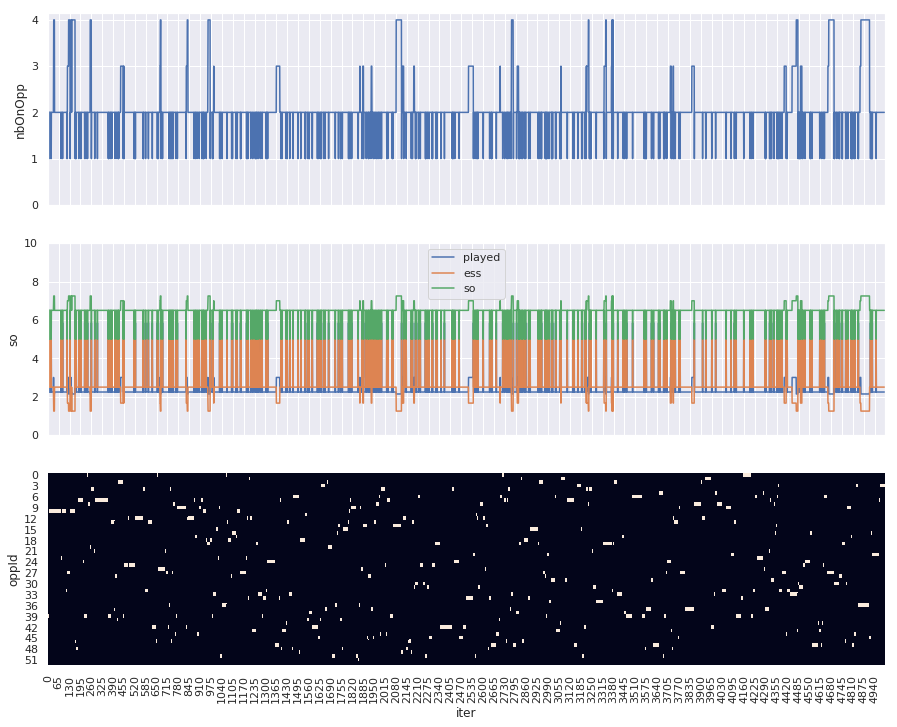

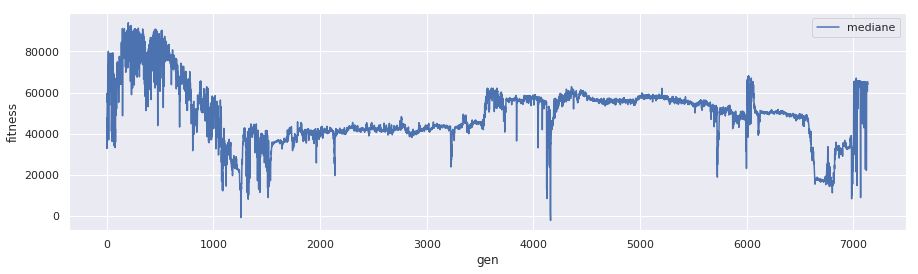

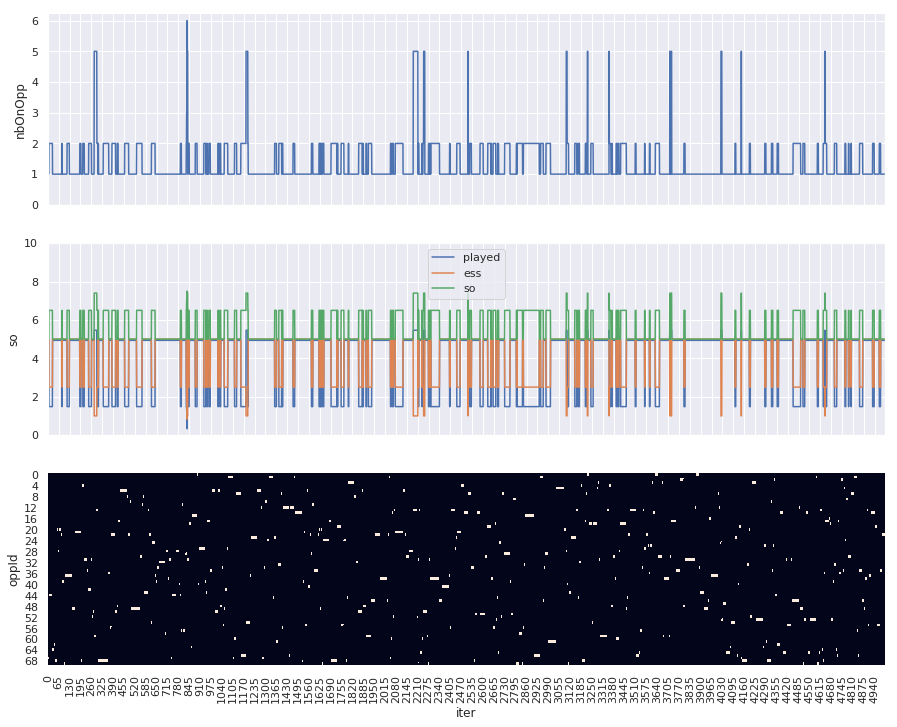

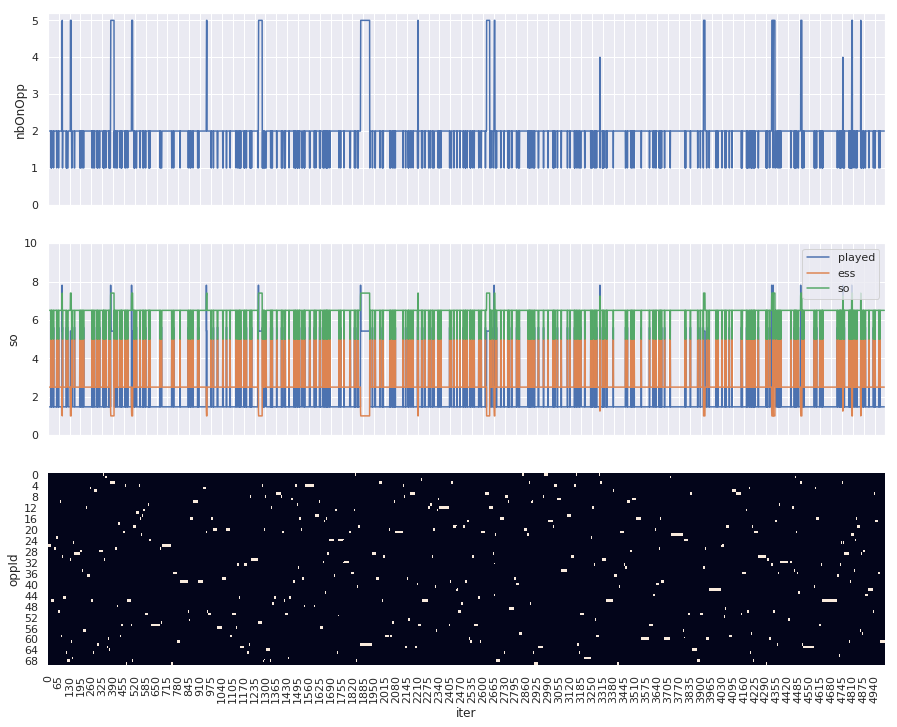

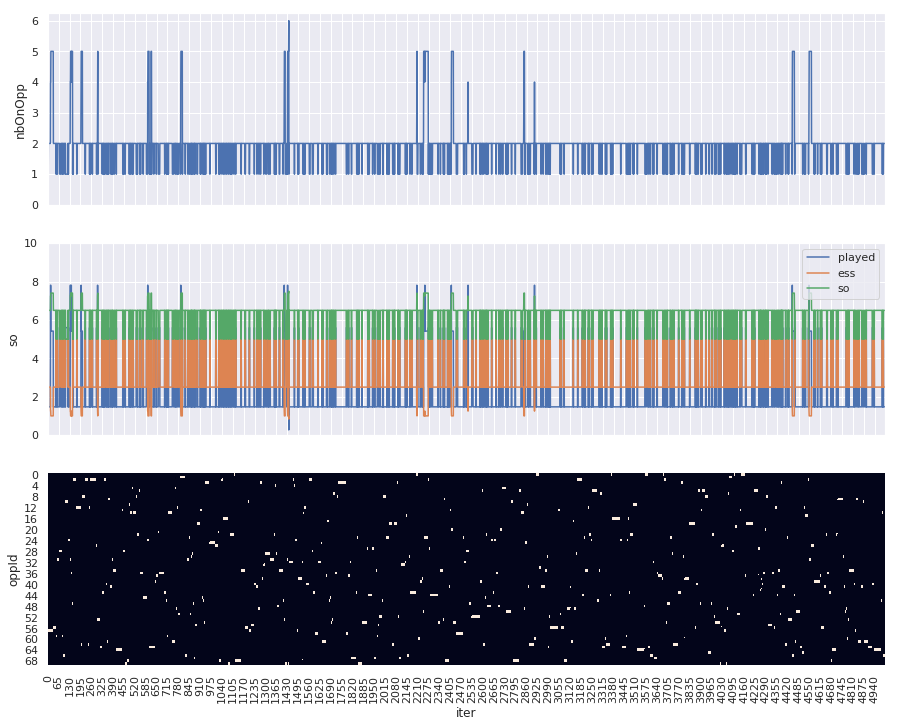

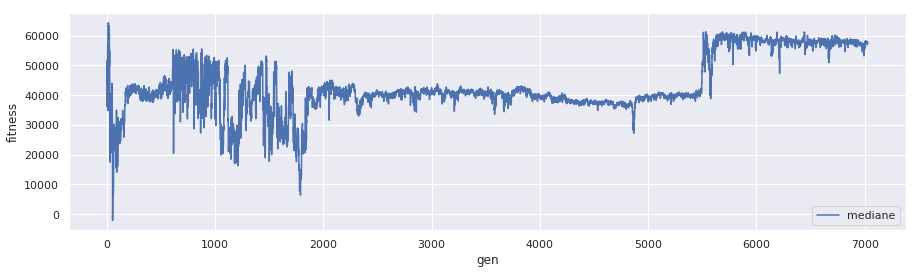

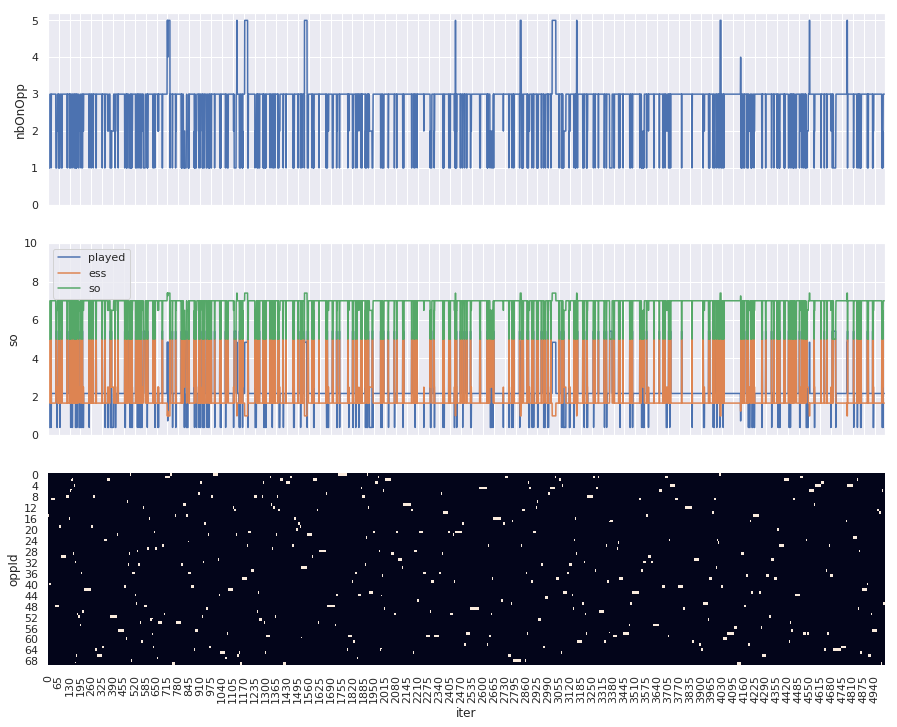

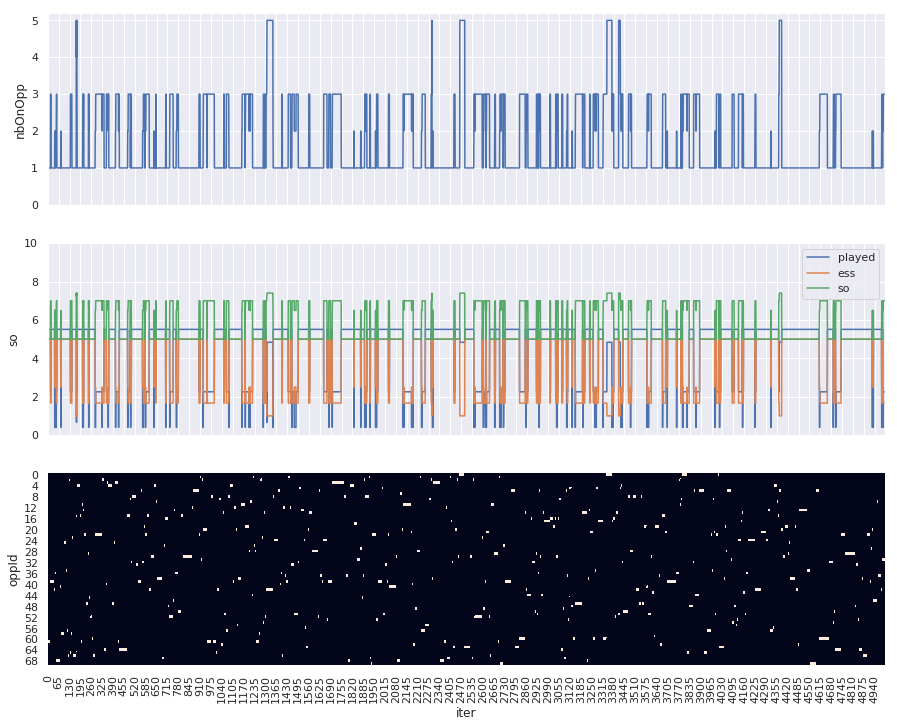

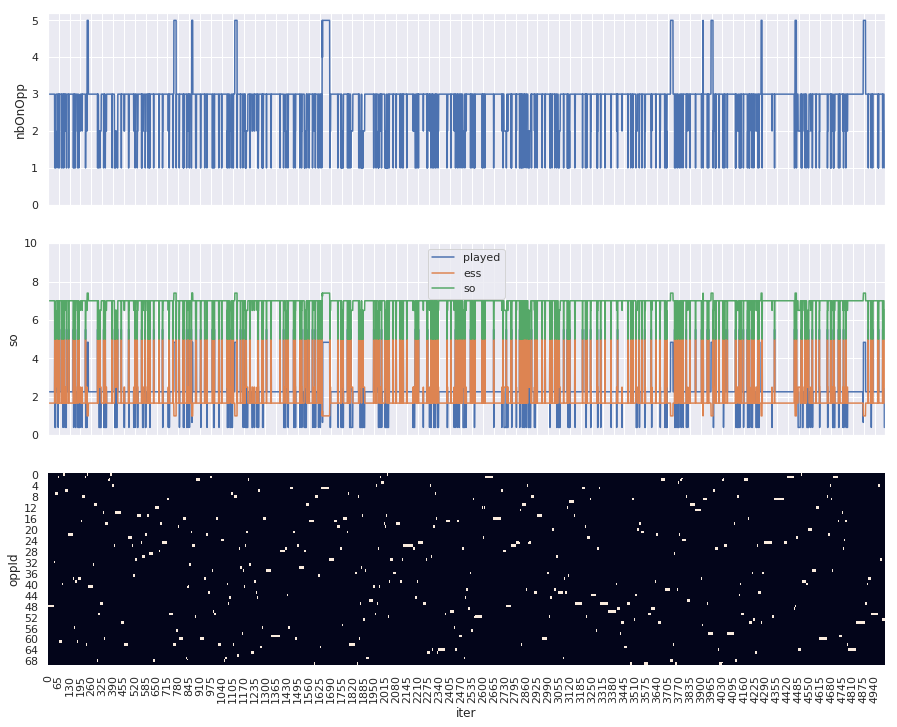

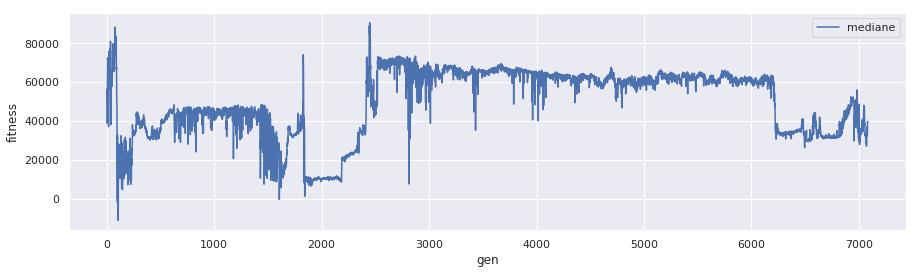

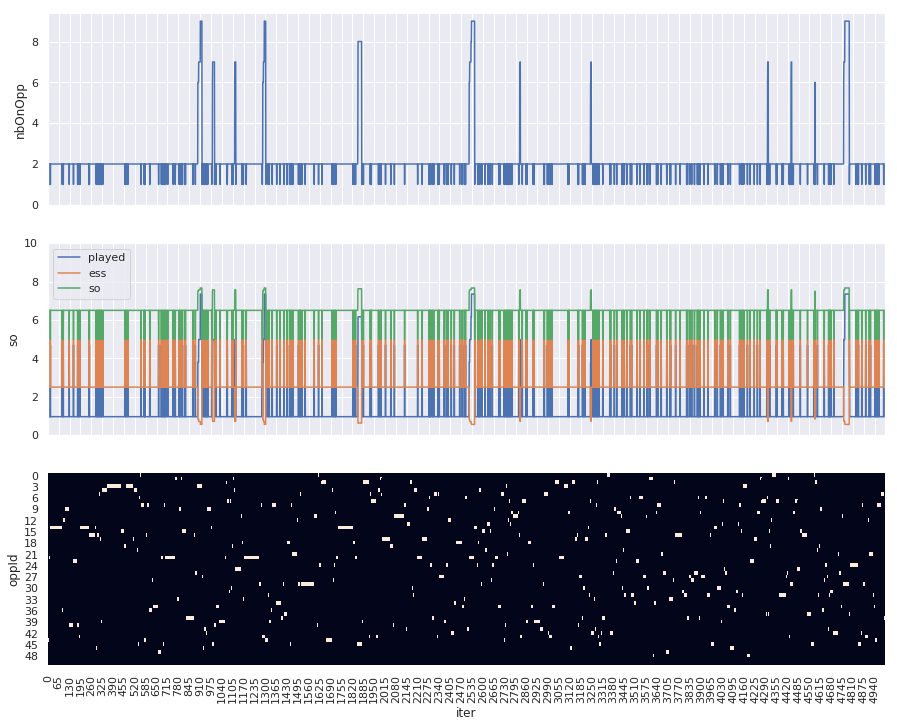

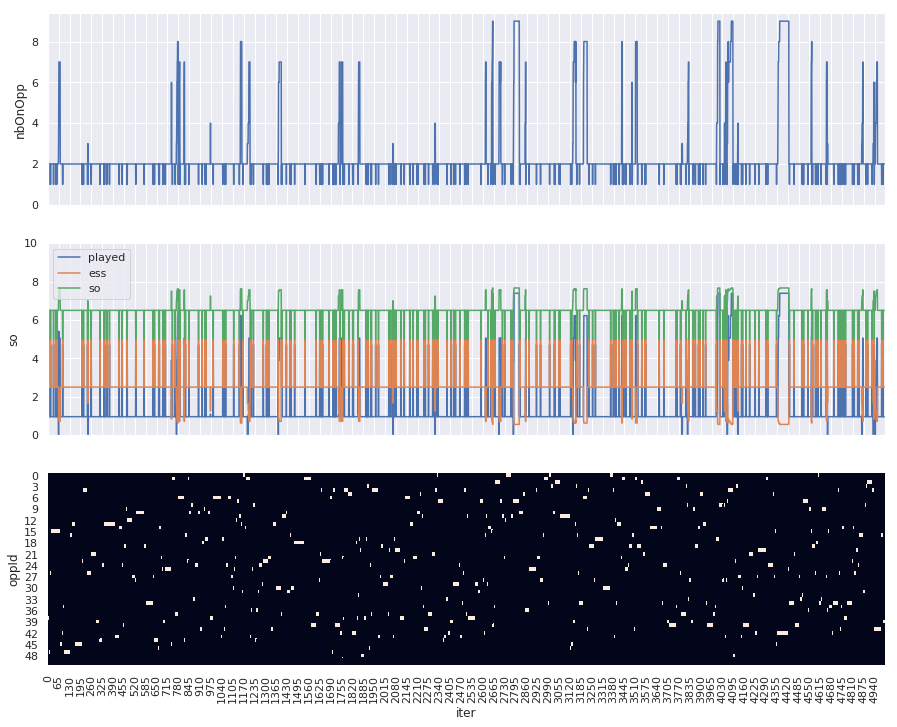

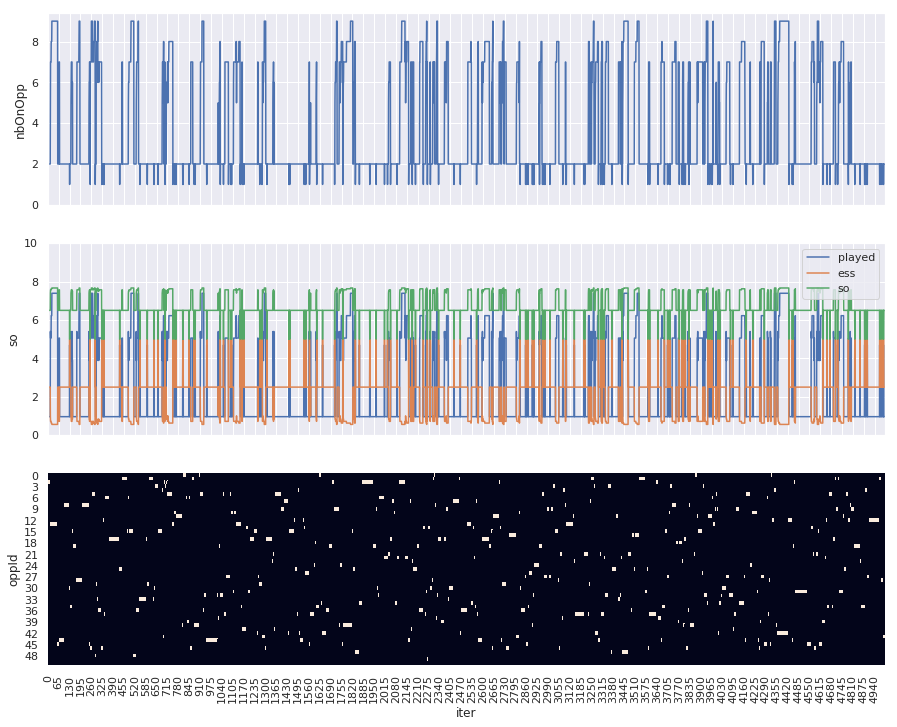

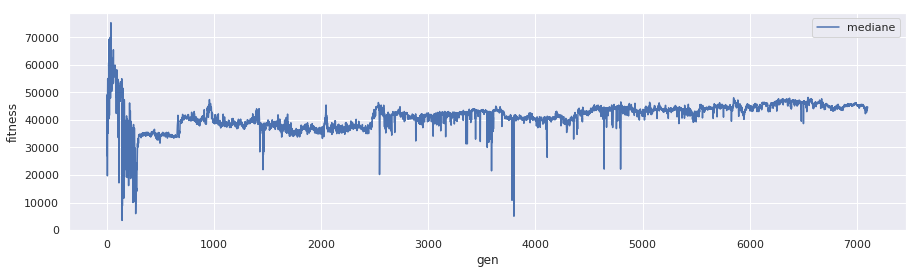

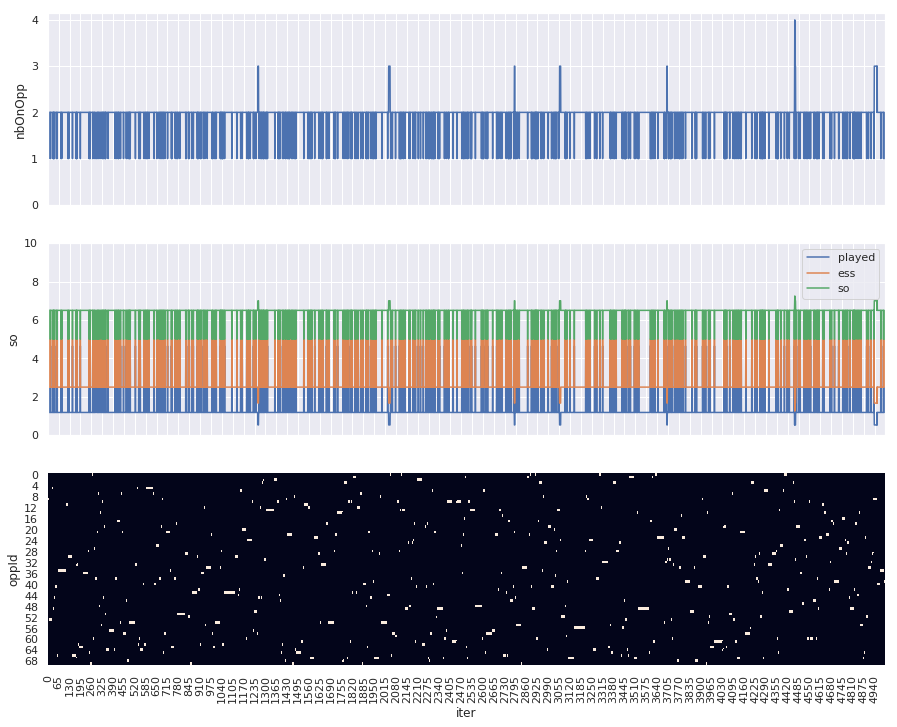

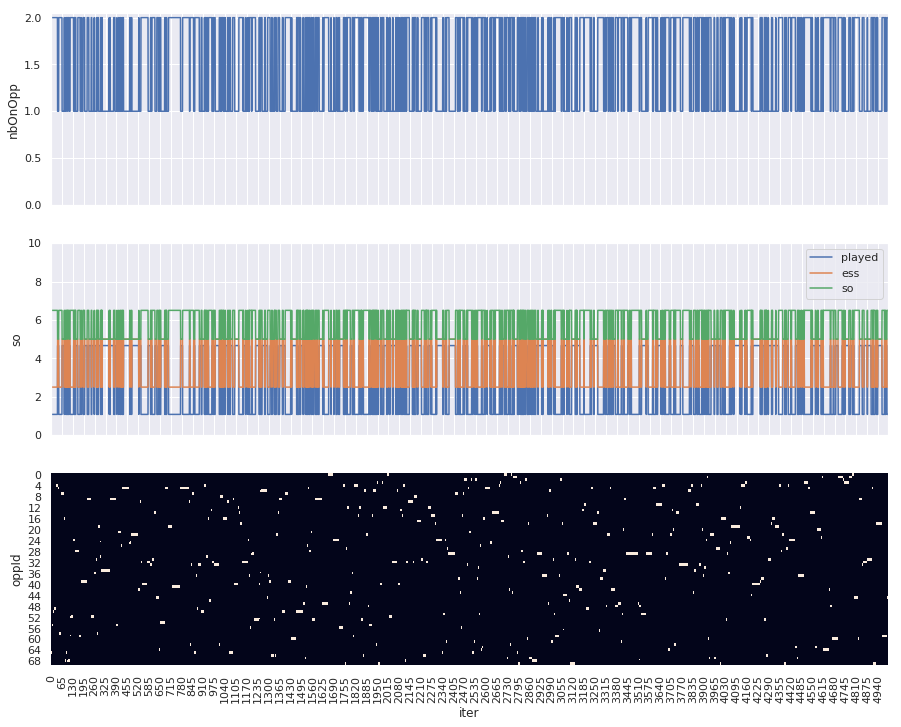

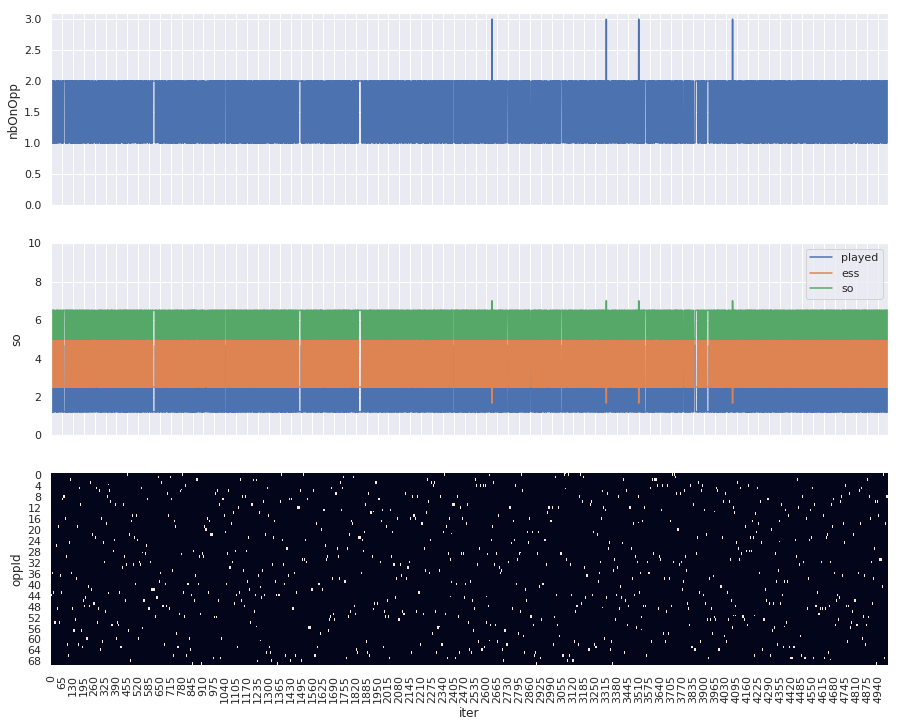

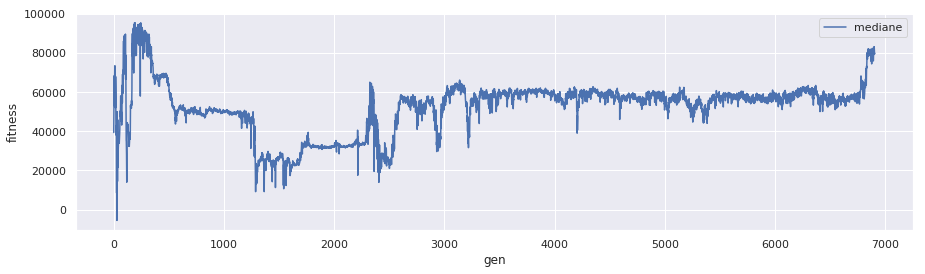

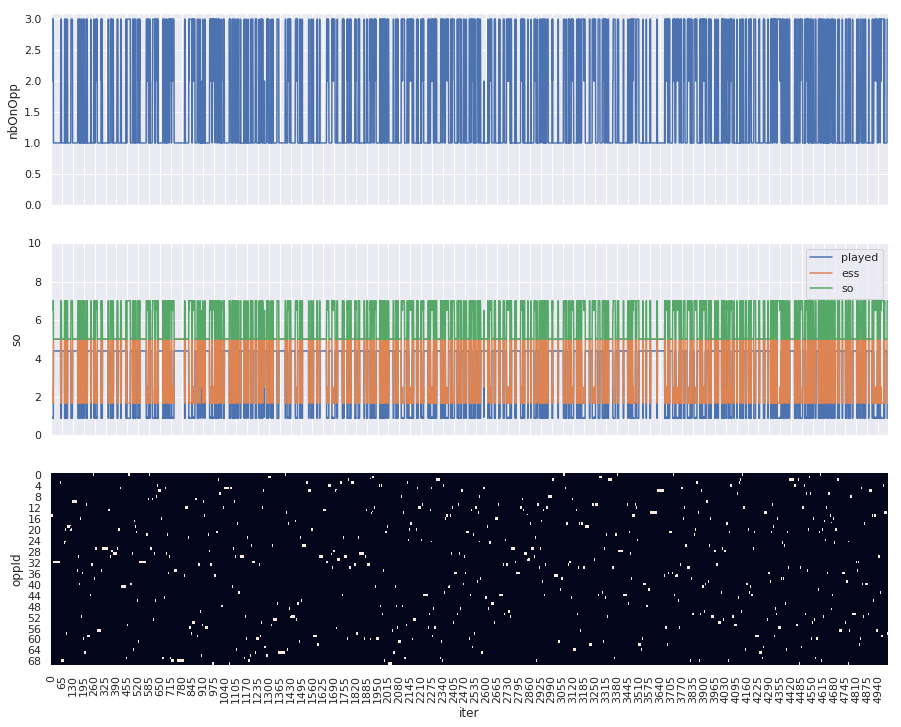

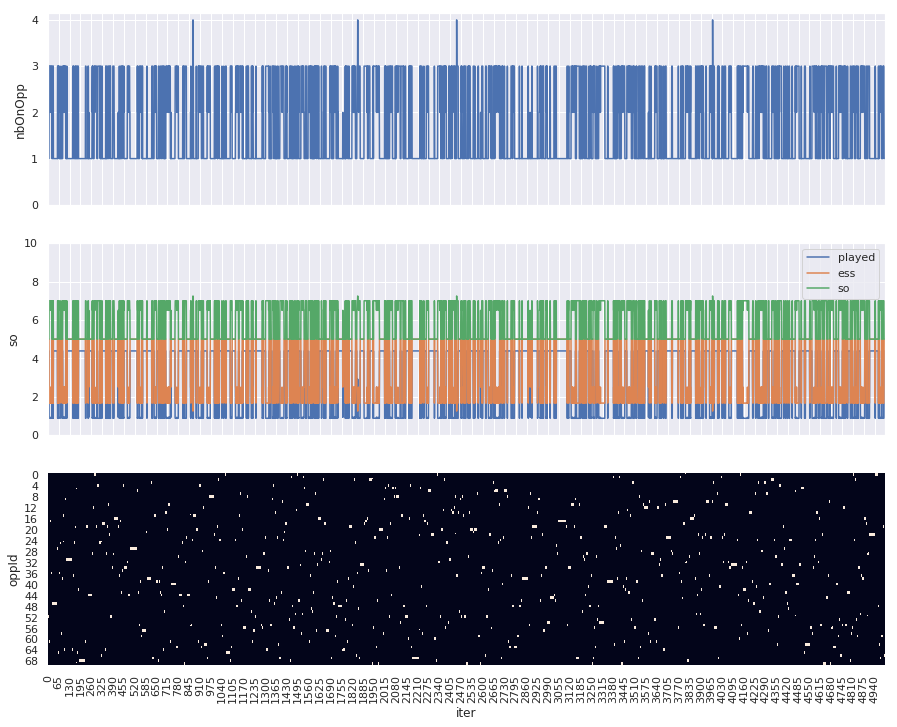

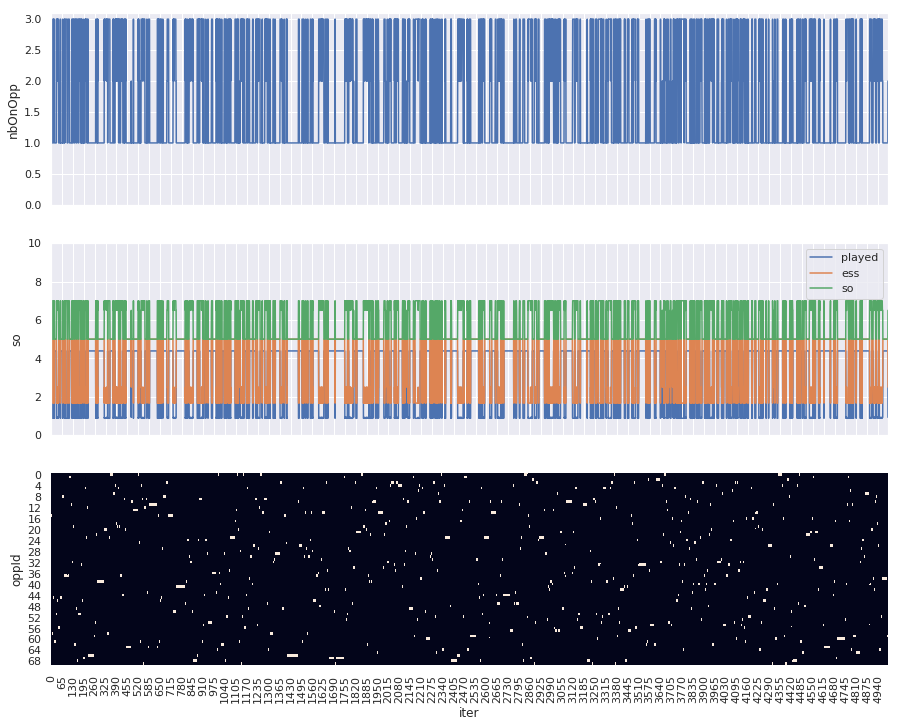

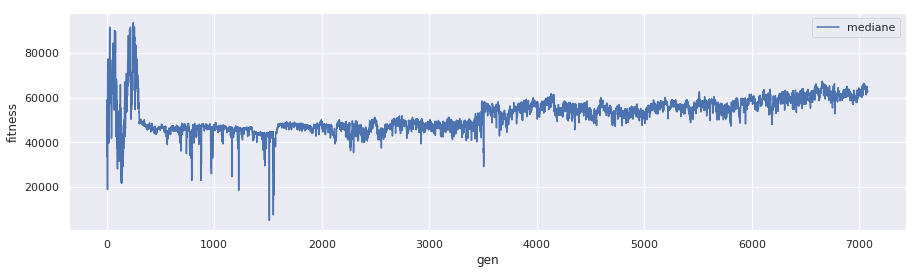

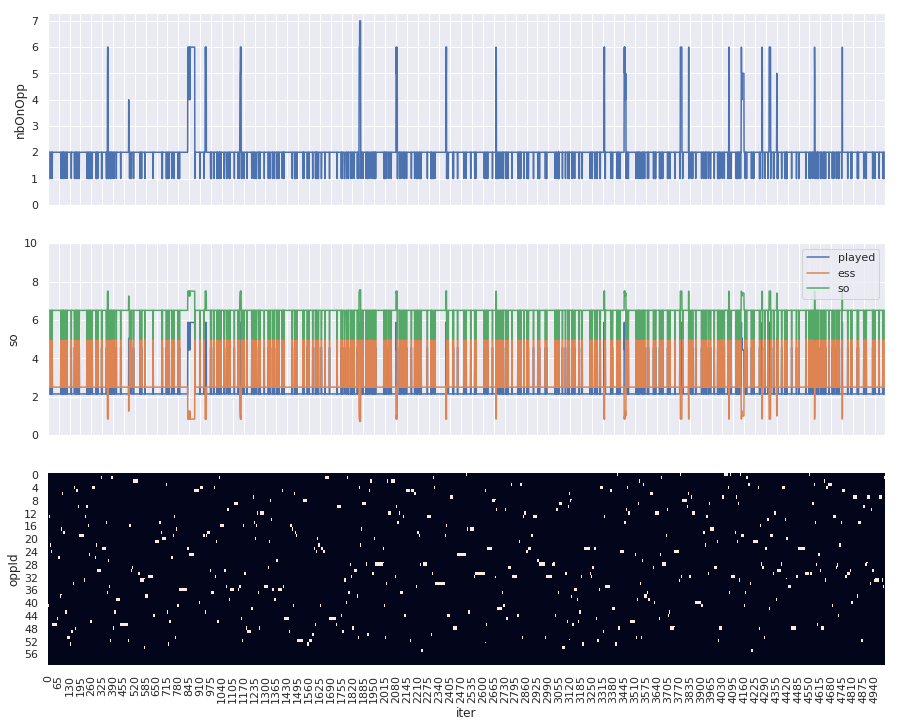

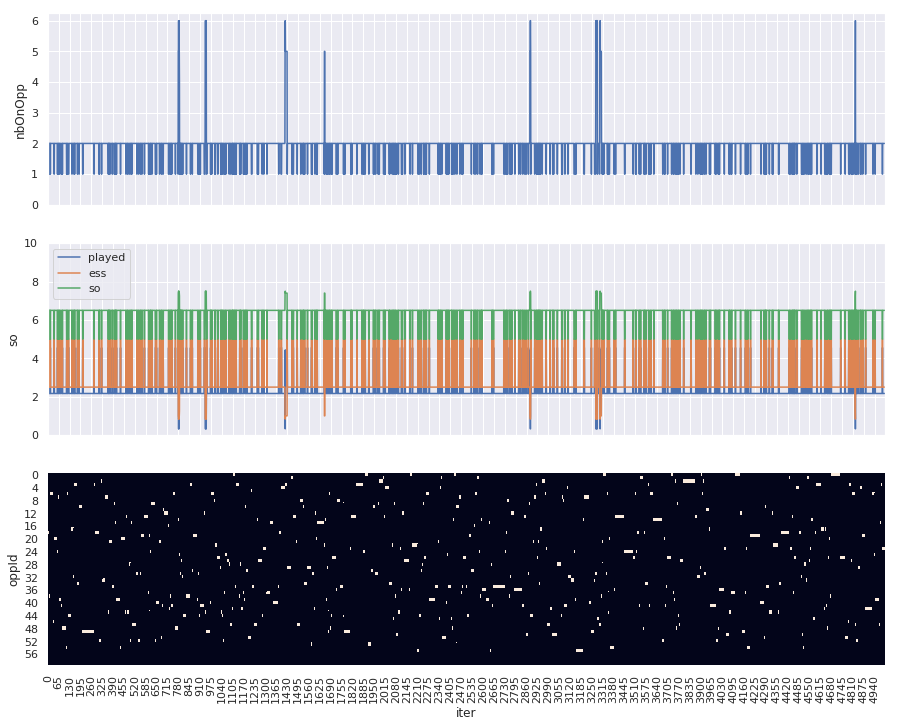

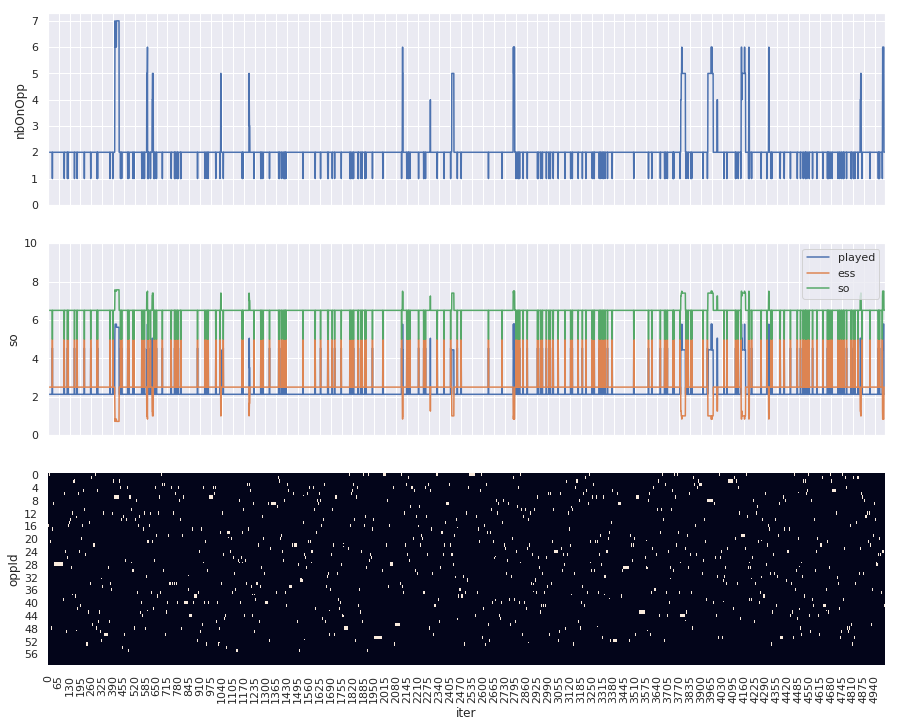

In [7]:
dofolloworbit = True
for path in sorted(glob.glob("/home/pecoffet/remoterobo/logs/lions-decay-10-2019-05*/lion/o70/**/rep00/", recursive=True)):
    display(HTML(f'<h3>{path}</h3>'))
    fit = read_csvx(path + "fitnesslog.txt", delimiter="\t")
    fit = fit.groupby(['gen', 'ind'], as_index=False).sum()
    plt.figure(figsize=(15, 4))
    sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='median', label="mediane")
    plt.legend()
    #sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='min')
    plt.show()
    logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    logall['ess'] = 5 / logall['nbOnOpp']
    logall['so'] = 5 + 3 - (3 /logall['nbOnOpp'])
    logall['oppId'] = logall['oppId'].astype('category')
    allopps = logall['oppId'].unique()
    for ind in [0, 10, 20]:
        subdf = logall.query(f'id == {ind} and eval == 0')
        a = subdf.pivot_table('id', 'iter', 'oppId', aggfunc='count', fill_value=0)
        # trick for add all the opps
        for oppval in allopps:
            if oppval not in a:
                a[oppval] = 0
        a.sort_index(axis=1, inplace=True)
        a = a.transpose()
        # end of trick 

        fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

        sns.lineplot(y='nbOnOpp', x='iter', sort=False, data=subdf, ax=axs[0])
        
        sns.lineplot(y='curCoopNoCoef', x='iter', sort=False, data=subdf, ax=axs[1], label="played")
        sns.lineplot(y='ess', x='iter', sort=False, data=subdf, ax=axs[1], label="ess")
        sns.lineplot(y='so', x='iter', sort=False, data=subdf, ax=axs[1], label="so")
        sns.heatmap(a, ax=axs[2], cbar=False)
        axs[0].set_ylim(0, None)
        axs[1].set_ylim(0, 10)
        axs[1].legend()
        plt.show()
    

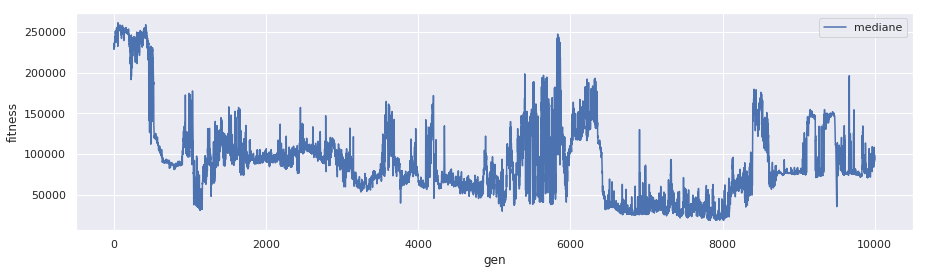

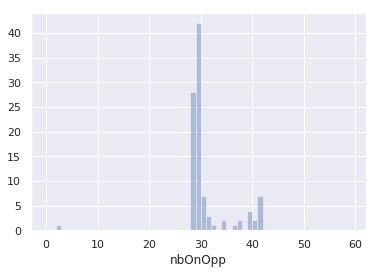

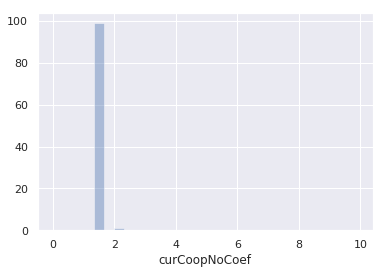

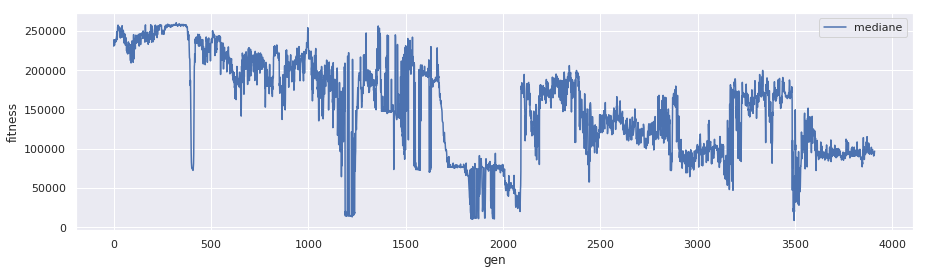

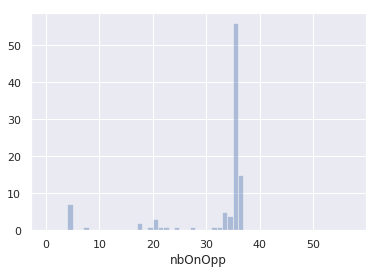

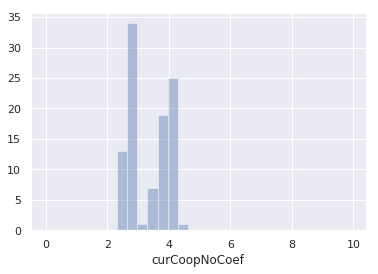

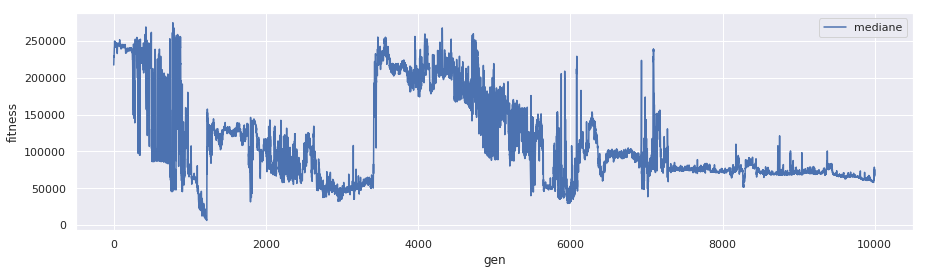

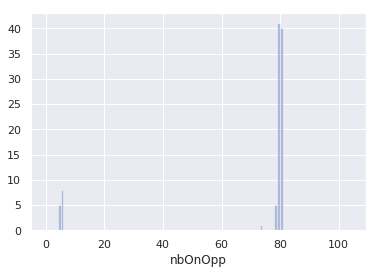

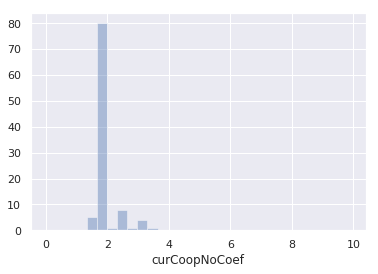

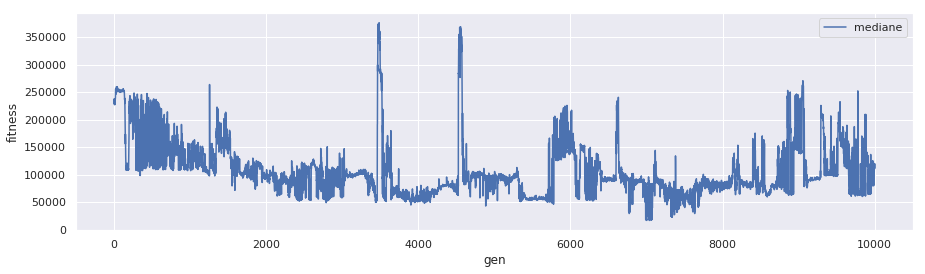

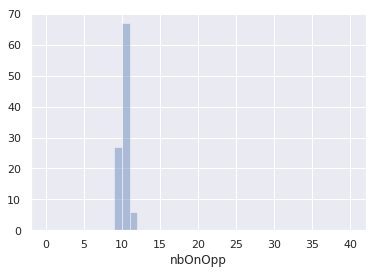

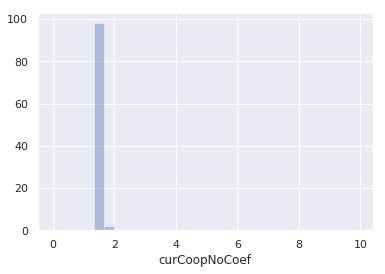

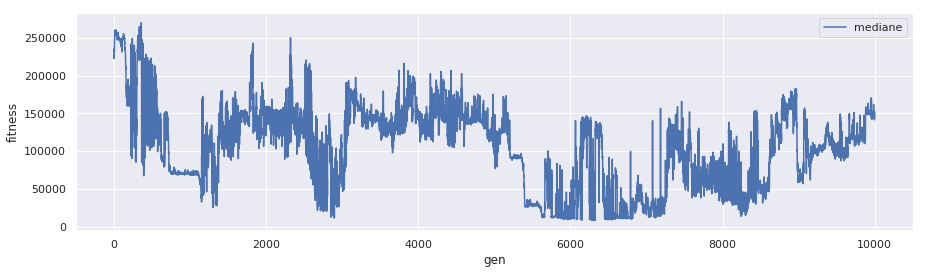

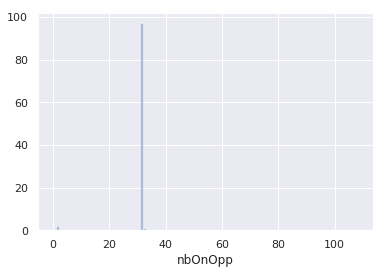

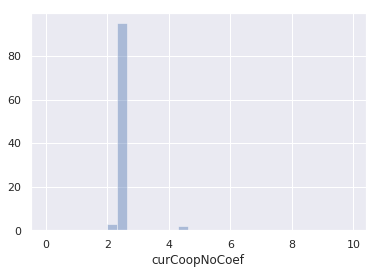

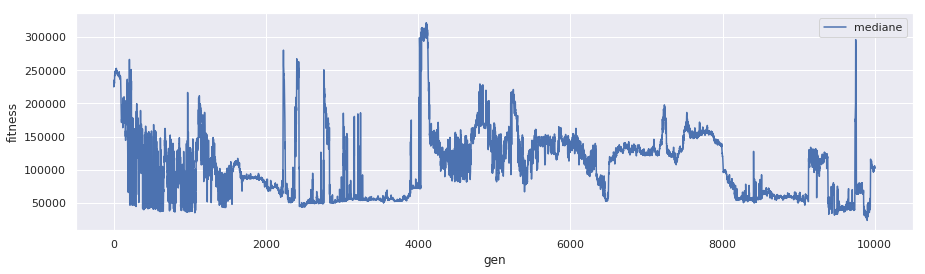

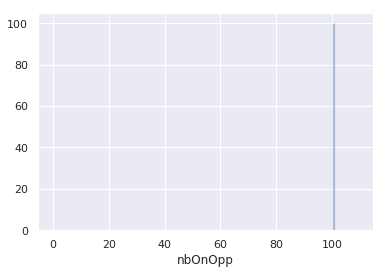

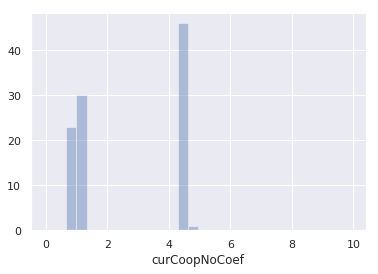

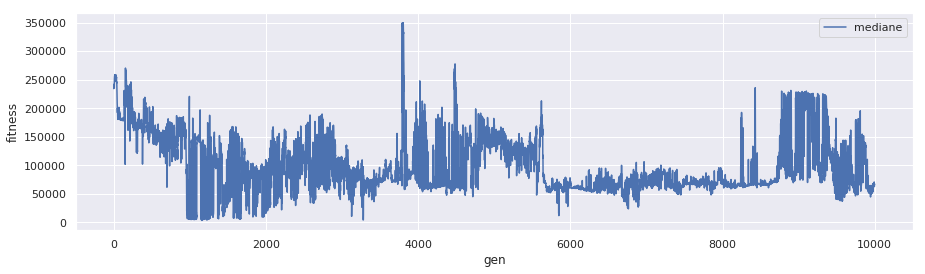

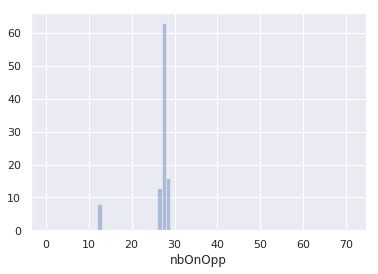

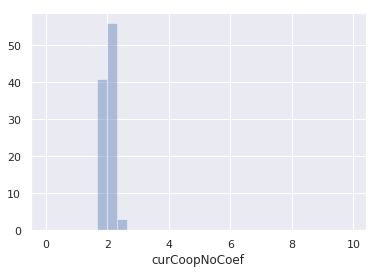

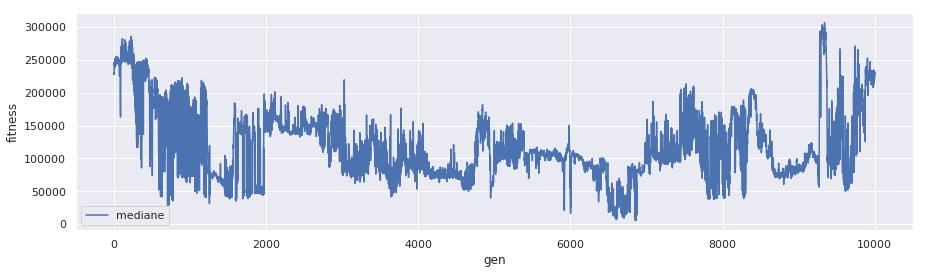

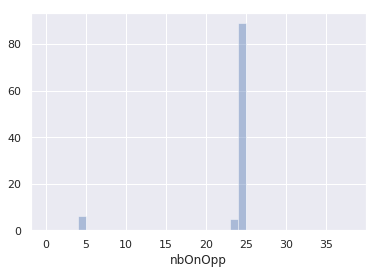

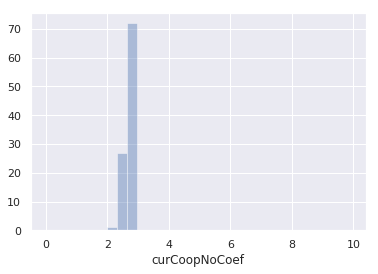

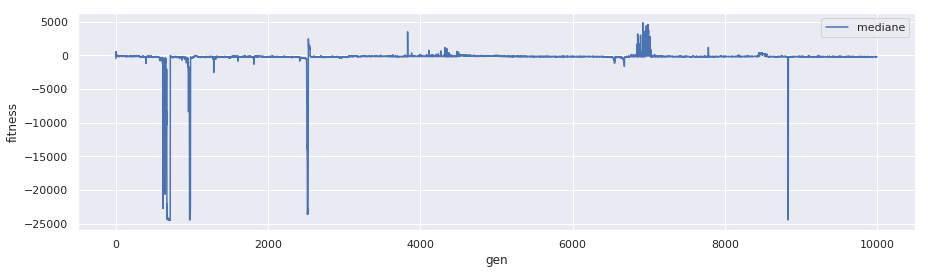

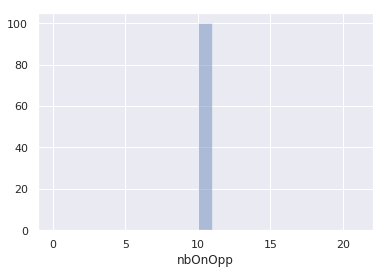

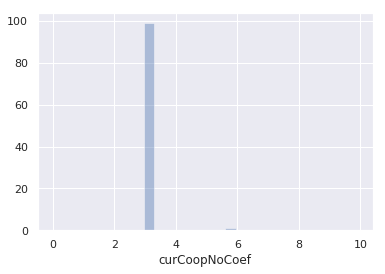

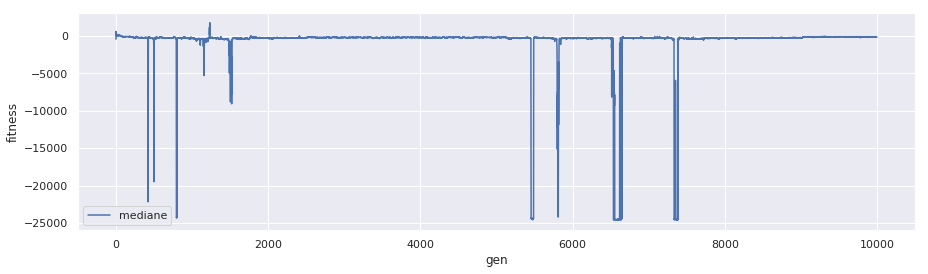

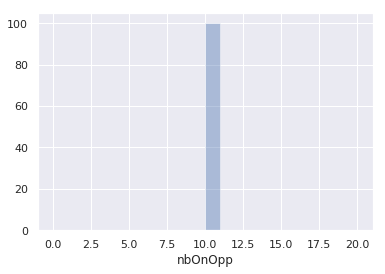

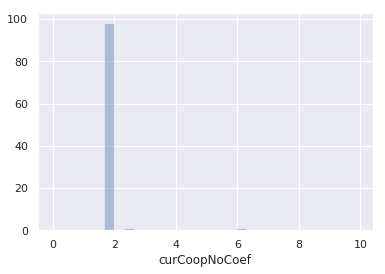

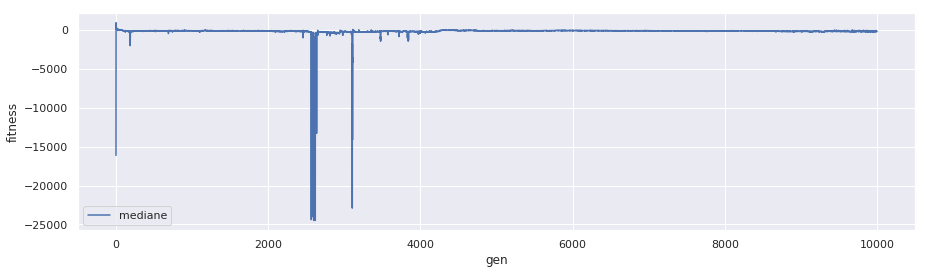

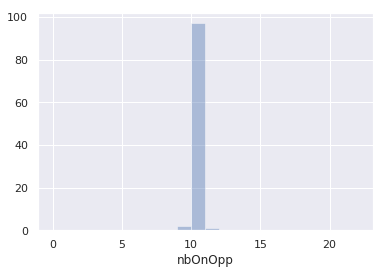

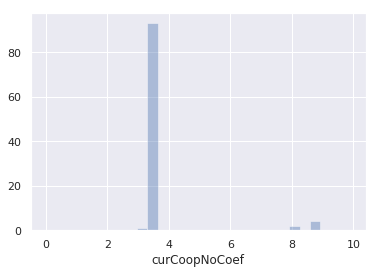

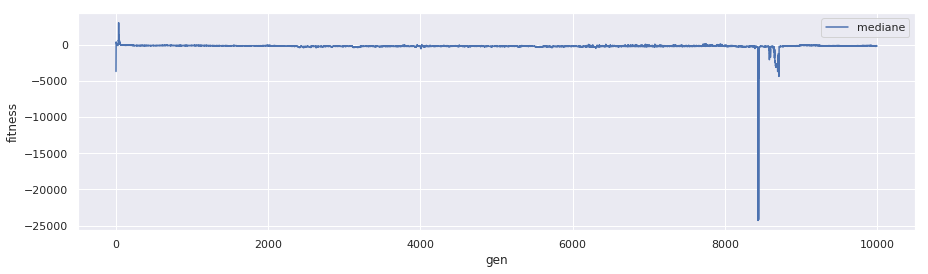

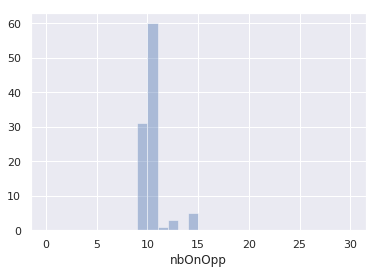

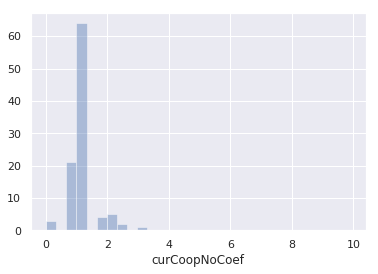

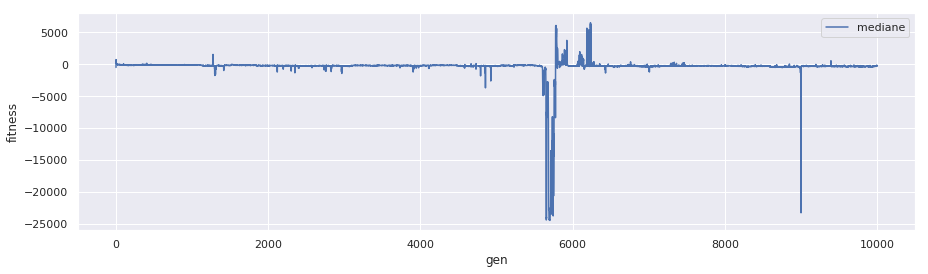

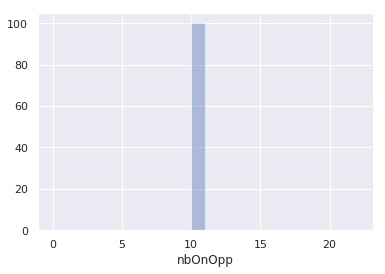

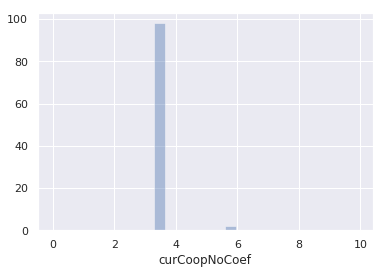

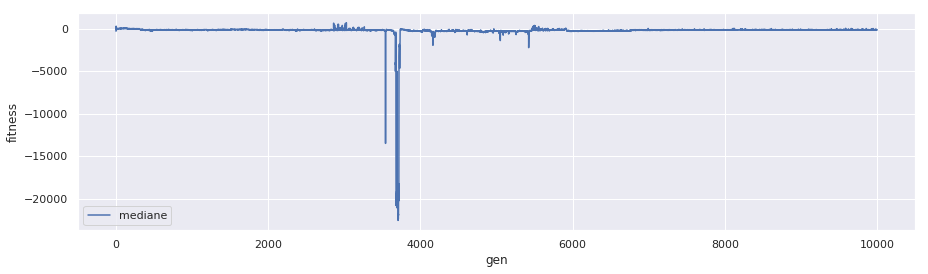

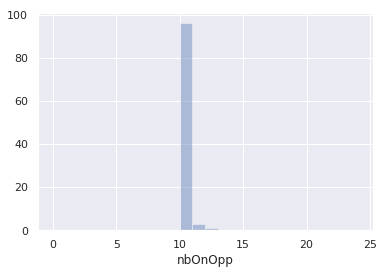

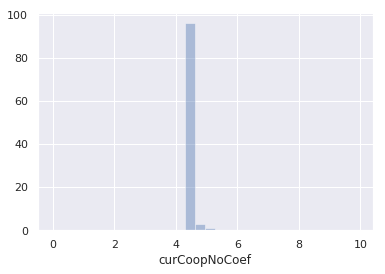

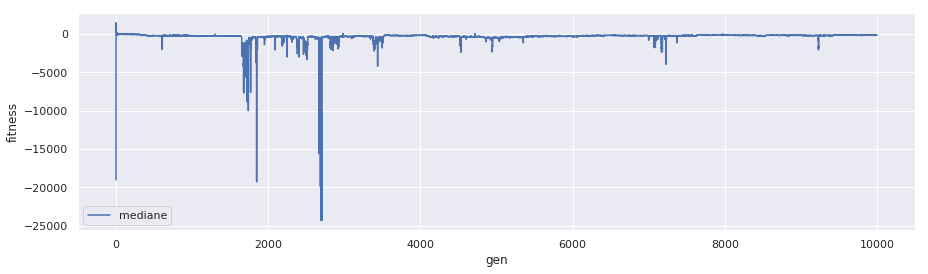

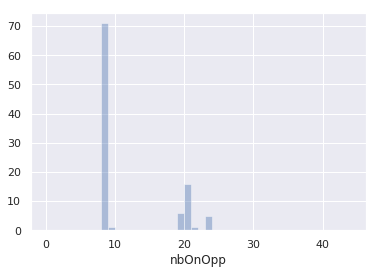

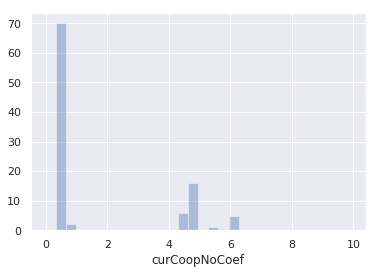

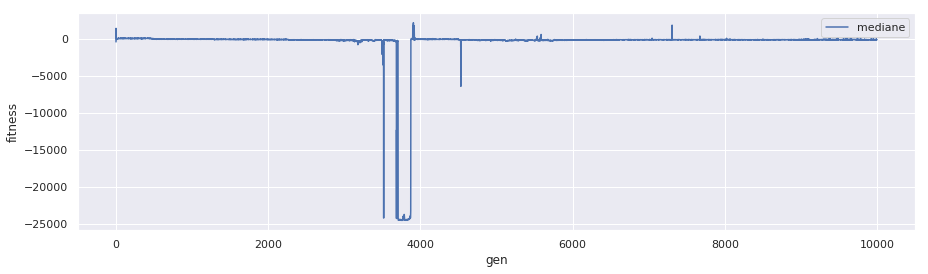

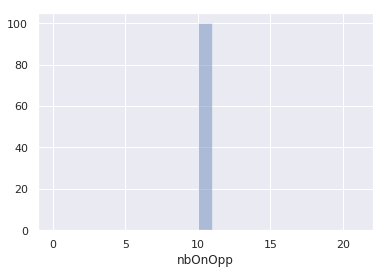

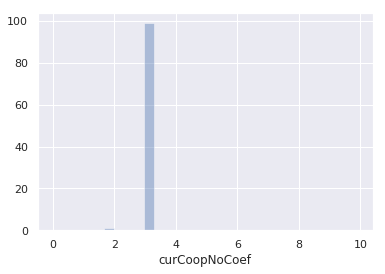

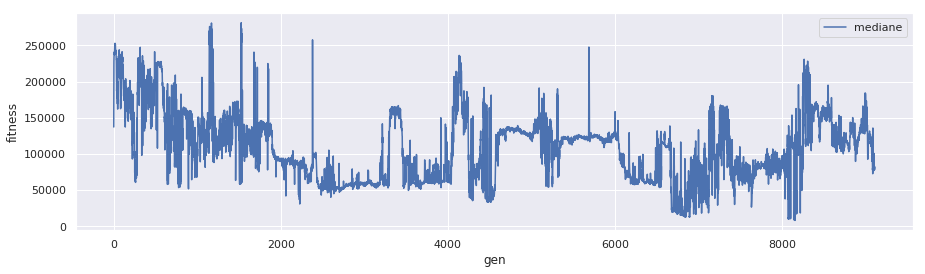

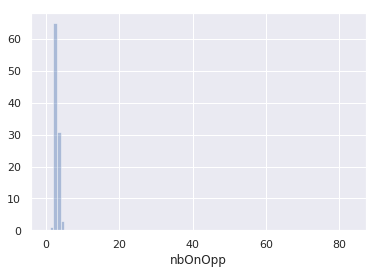

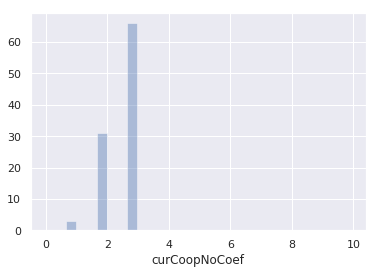

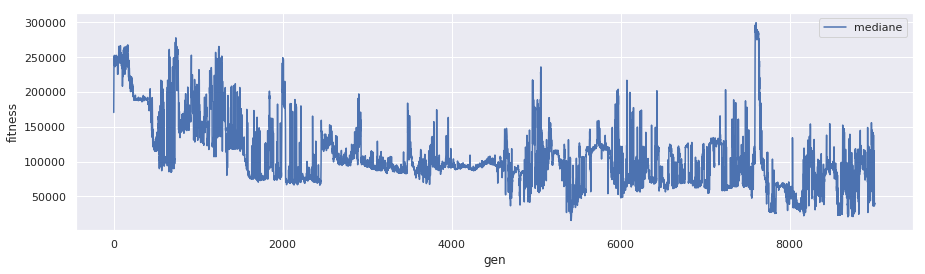

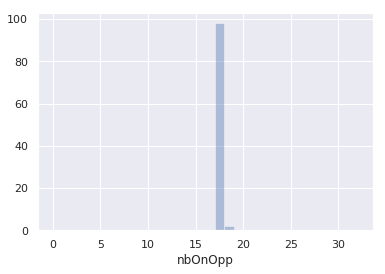

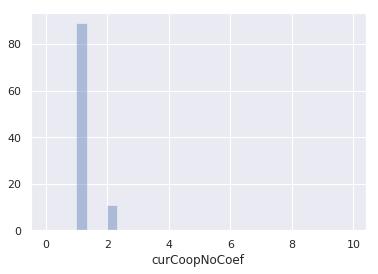

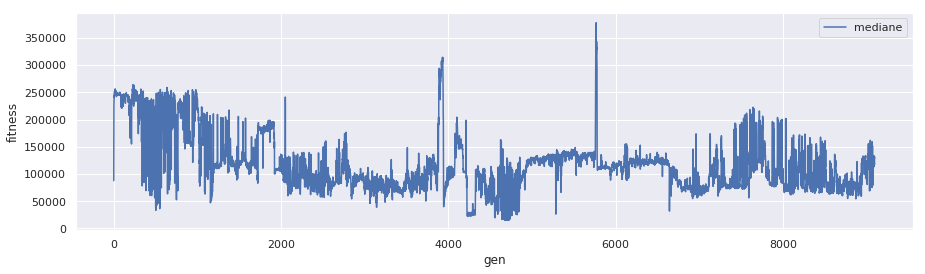

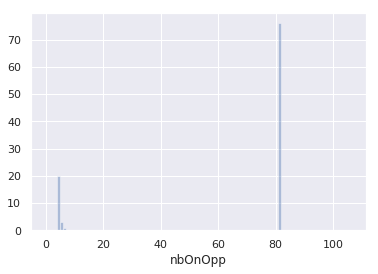

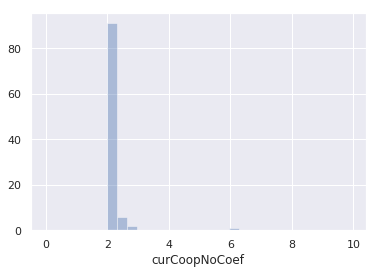

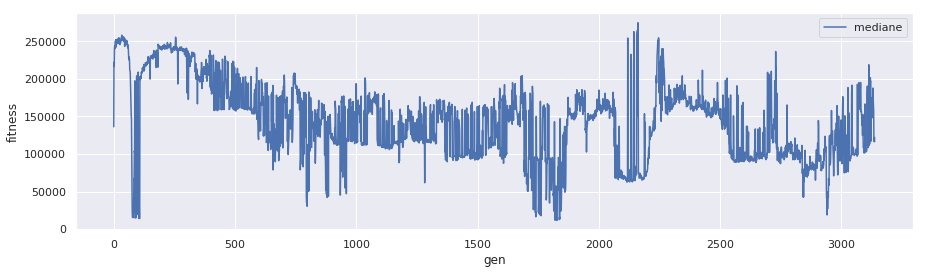

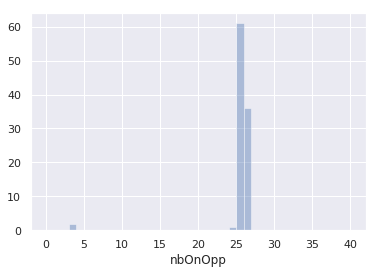

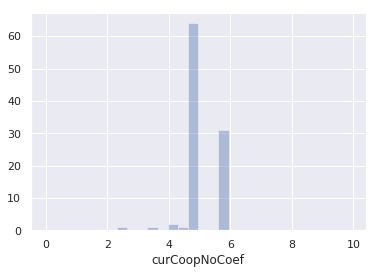

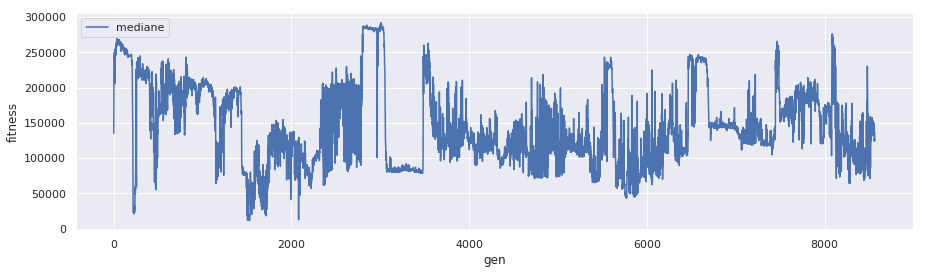

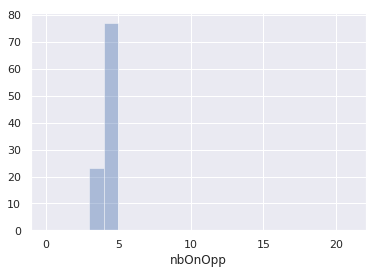

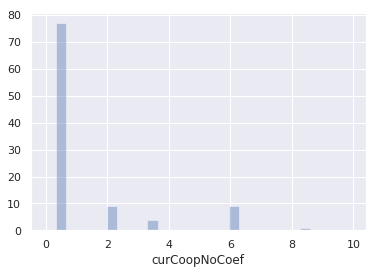

KeyboardInterrupt: 

In [5]:
for path in sorted(glob.glob("/home/pecoffet/remoterobo/logs/lions-decay-50-2019-05-18-0036/**/rep00/", recursive=True)):
    display(HTML(f'<h3>{path}</h3>'))
    fit = read_csvx(path + "fitnesslog.txt", delimiter="\t")
    fit = fit.groupby(['gen', 'ind'], as_index=False).sum()
    plt.figure(figsize=(15, 4))
    sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='median', label="mediane")
    plt.legend()
    #sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='min')
    plt.show()
    logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    logall['ess'] = 5 / logall['nbOnOpp']
    logall['so'] = 5 + 3 - (3 /logall['nbOnOpp'])
    logall['oppId'] = logall['oppId'].astype('category')
    plt.figure()
    sns.distplot(logall.groupby('id')['nbOnOpp'].median(), kde=False, bins=np.arange(0, logall['nbOnOpp'].max() + 10))
    plt.show()
    plt.figure()
    sns.distplot(logall.groupby('id')['curCoopNoCoef'].median(), kde=False, bins=np.arange(0, 10, 0.33))

    plt.show()